# Problem statement:-
    
***Customer churn is a big problem for telecommunications companies. Indeed, their annual churn rates are usually higher than      10%. For that reason, they develop strategies to keep as many clients as possible.***

***To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we      will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of      churn and identify the main indicators of churn.***

***This is a Two-Class classification project since the variable to be predicted is binary. (churn or loyal customer)***

***Retaining high profitable customer is the main business goals here.***

# Exploratory Data Analysis of the Telecommunication Dataset

## LOADING DATA AND IMPORTING VALUES

In [ ]:
#importing the required libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import read_csv
from pandas import set_option
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Understanding more about Data 

In [ ]:
#Reading the CSV file from pandas library

tele=pd.read_csv('telecommunications_churn.csv')

In [ ]:
#Executes the top 5 rows in the Dataset 
tele.head(5)

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [ ]:
#Executes the Random 10 rows in the Dataset 

tele.sample(10)

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
3254,57,1,30,179.2,283.2,228.1,14.7,1,0,105,30.46,83,24.07,77,10.26,5,3.97,68.76,0
734,93,1,20,187.5,169.8,175.3,12.1,1,1,110,31.88,94,14.43,127,7.89,4,3.27,57.47,0
1916,72,0,0,175.5,132.3,242.9,11.8,1,0,103,29.84,120,11.25,96,10.93,3,3.19,55.21,0
3103,115,0,0,195.9,227.0,313.2,13.2,2,0,111,33.30,108,19.30,113,14.09,1,3.56,70.25,0
2219,94,1,28,92.7,127.8,225.6,9.9,3,0,107,15.76,86,10.86,86,10.15,4,2.67,39.44,0
2717,142,1,38,163.3,136.0,249.1,4.3,0,0,104,27.76,114,11.56,127,11.21,6,1.16,51.69,0
2998,71,0,0,211.2,252.7,225.8,12.3,0,0,70,35.90,122,21.48,104,10.16,3,3.32,70.86,0
2135,100,0,0,160.3,221.3,150.4,11.2,0,0,138,27.25,92,18.81,120,6.77,2,3.02,55.85,0
571,186,1,26,74.3,177.3,296.3,14.5,2,0,107,12.63,116,15.07,90,13.33,3,3.92,44.95,0
2441,111,1,13,193.1,111.6,227.4,12.1,1,0,104,32.83,98,9.49,94,10.23,4,3.27,55.82,0


In [ ]:
#Getting the shape of Dataset with rows and columns

print(tele.shape)

(3333, 19)


In [ ]:
# size of dataset
tele.size

63327

In [ ]:
#Gives information of the Datatypes present in the Dataset

tele.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [ ]:
#Getting to know all the columns present in the Dataset

tele.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [ ]:
#Getting to know all the columns present in the Dataset

list(tele.columns)

['account_length',
 'voice_mail_plan',
 'voice_mail_messages',
 'day_mins',
 'evening_mins',
 'night_mins',
 'international_mins',
 'customer_service_calls',
 'international_plan',
 'day_calls',
 'day_charge',
 'evening_calls',
 'evening_charge',
 'night_calls',
 'night_charge',
 'international_calls',
 'international_charge',
 'total_charge',
 'churn']

In [ ]:
#Gives information about Null-Values

tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [ ]:
#Getting information about number of Unique Values in each Column

tele.nunique()

account_length             212
voice_mail_plan              2
voice_mail_messages         46
day_mins                  1667
evening_mins              1611
night_mins                1591
international_mins         162
customer_service_calls      10
international_plan           2
day_calls                  119
day_charge                1667
evening_calls              123
evening_charge            1440
night_calls                120
night_charge               933
international_calls         21
international_charge       162
total_charge              2227
churn                        2
dtype: int64

In [ ]:
#Looking for the dataset to get insights of the data in Tabular form

tele.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
voice_mail_plan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00
voice_mail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
day_mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
evening_mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
night_mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
international_mins,3333.0,10.237294,2.791840,0.00,8.50,10.30,12.10,20.00
customer_service_calls,3333.0,1.562856,1.315491,0.00,1.00,1.00,2.00,9.00
international_plan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00


In [ ]:
# Target variable
#Printing the count of True or False in the 'Churn' Feature

print(tele.churn.value_counts())

0    2850
1     483
Name: churn, dtype: int64


# Checking the Missing and Duplicated Values

In [ ]:
#Checking for whether there is any Missing or Null Values
tele.isnull()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3329,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Checking for whether there is any Missing or Null Values

tele.isnull().sum()


account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [ ]:
tele.isna().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

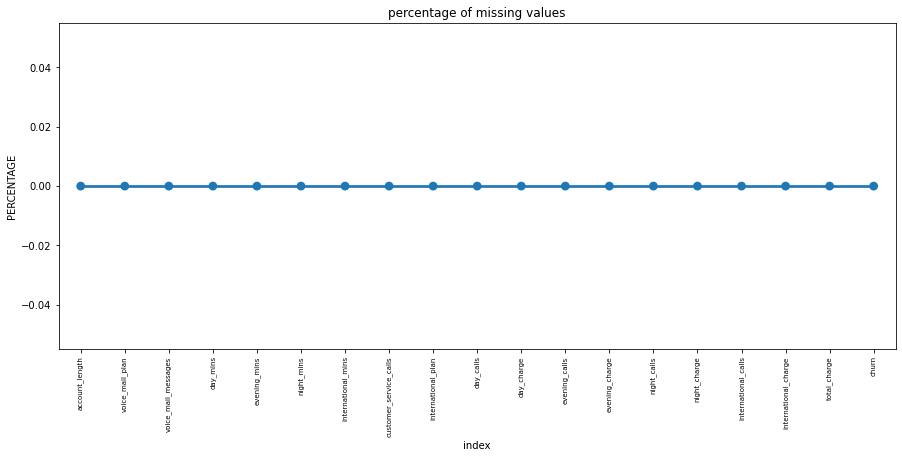

In [ ]:
missing=pd.DataFrame((tele.isnull().sum())*100/tele.shape[0]).reset_index()
plt.figure(figsize=(15,6))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title('percentage of missing values')
plt.ylabel('PERCENTAGE')
plt.show()

# Duplicates

In [ ]:
#Checking Duplicated values

len(tele[tele.duplicated()])

0

In [ ]:
# count of duplicates rows
tele[tele.duplicated()].shape

(0, 19)

# Outlier Detection

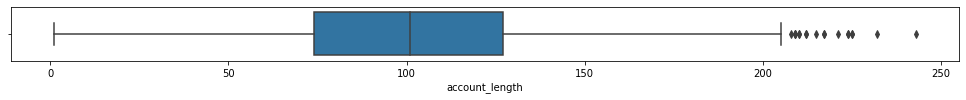

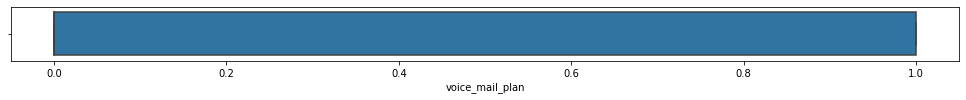

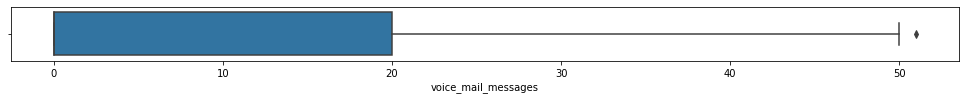

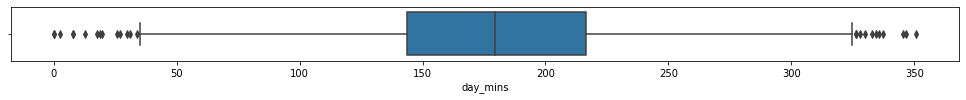

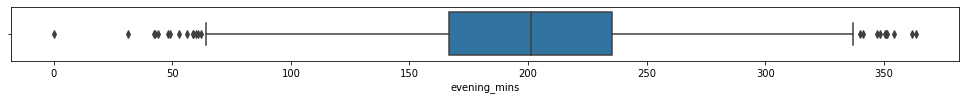

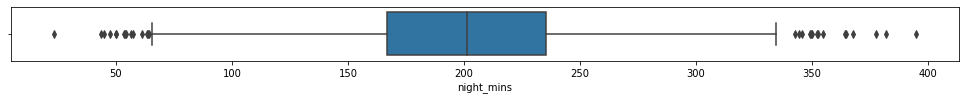

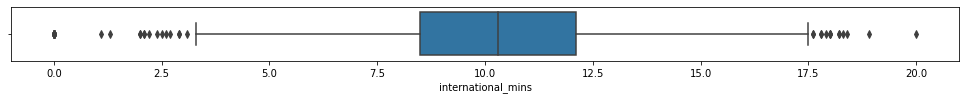

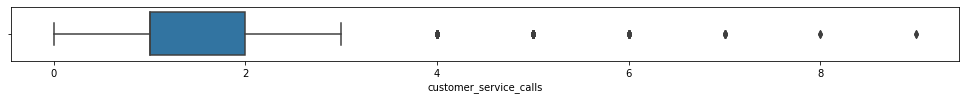

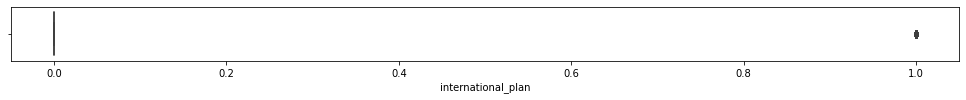

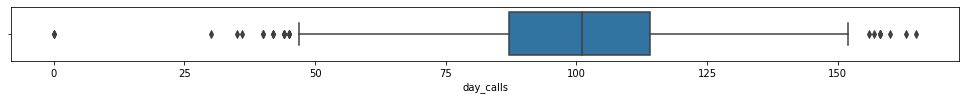

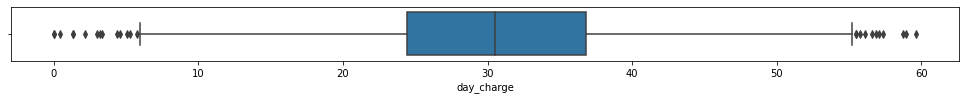

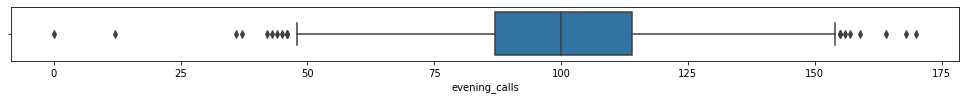

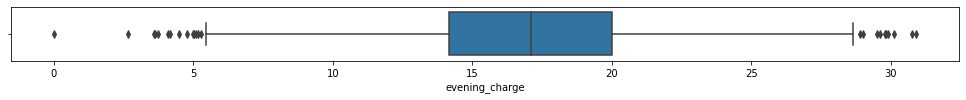

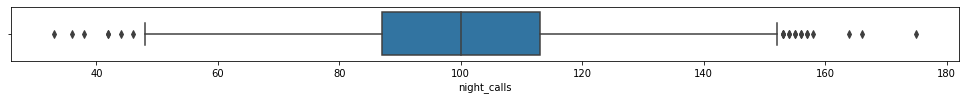

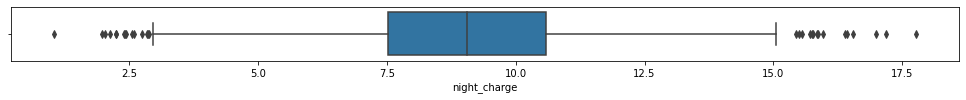

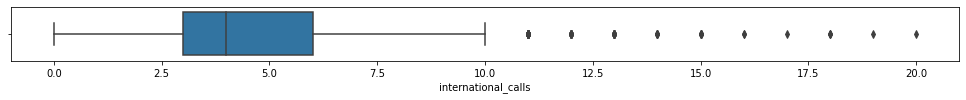

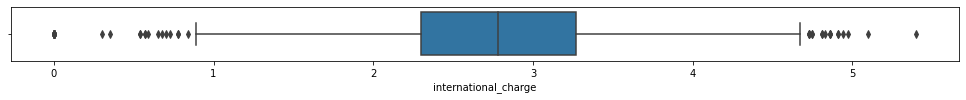

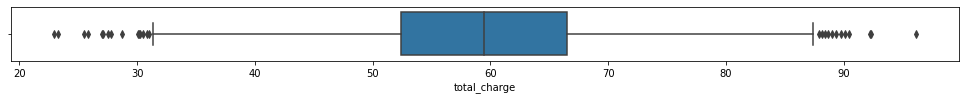

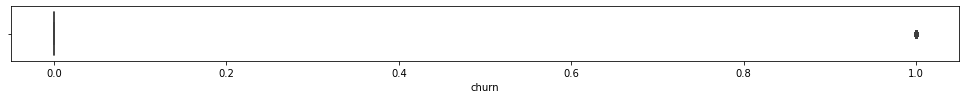

In [ ]:
#Printing boxplot for each numerical column present in the data set
dg=tele.select_dtypes(exclude=['object','bool'])
for column in dg:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=dg, x=column)
plt.show()

# Observations :-

***1. By analysing the above histograms we can say that in the given data apart from the voice_mail_messages, 
      customer_service_calls, and international_calls columns, remaining all the columns have almost symmetric data.***

***2. The voice_mail_messages, customer_service_calls, and international_calls columns contains the positively skewed data.***

# Observations :-

***1. After analysing all the above box plots we can say that the given dataset contains lot of 
       noisy data points or outliers.***

***2. The independent column "voice_mail_messages" have only one single outlier.***

***3. As the given data contains outliers need to perfrom Isolation Forest in order to remove the outliers.***

## Handling Outliers by using Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
df = tele.copy()
clf = IsolationForest(random_state=10, contamination=0.1)
clf.fit(df)


IsolationForest(contamination=0.1, random_state=10)

In [ ]:
outliere_predict = clf.predict(df)
print(outliere_predict)

[ 1  1  1 ...  1 -1  1]


In [ ]:
df["Score"] = clf.decision_function(df)
df["Anomaly"] = clf.predict(df.iloc[:, 0:19])
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,Score,Anomaly
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,99,16.78,91,11.01,3,2.70,75.56,0,0.080021,1
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,103,16.62,103,11.45,3,3.70,59.24,0,0.080715,1
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,110,10.30,104,7.32,5,3.29,62.29,0,0.099510,1
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,88,5.26,89,8.86,7,1.78,66.80,0,-0.062227,-1
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,122,12.61,121,8.41,3,2.73,52.09,0,0.062367,1


In [ ]:
outliers = df[df["Anomaly"]==-1]
outliers

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,Score,Anomaly
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,88,5.26,89,8.86,7,1.78,66.80,0,-0.062227,-1
9,141,1,37,258.6,222.0,326.4,11.2,0,1,84,...,111,18.87,97,14.69,5,3.02,80.54,0,-0.012455,-1
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,...,97,27.01,128,7.23,9,1.46,92.29,1,-0.084793,-1
21,77,0,0,62.4,169.9,209.6,5.7,5,0,89,...,121,14.44,64,9.43,6,1.54,36.02,1,-0.056372,-1
32,172,0,0,212.0,31.2,293.3,12.6,3,0,121,...,115,2.65,78,13.20,10,3.40,55.29,0,-0.036858,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,170,1,42,199.5,135.0,184.6,10.9,4,0,119,...,90,11.48,49,8.31,3,2.94,56.65,1,-0.019772,-1
3291,119,1,22,172.1,223.6,150.0,13.9,1,1,119,...,133,19.01,94,6.75,20,3.75,58.77,1,-0.042045,-1
3320,122,0,0,140.0,196.4,120.1,9.7,4,1,101,...,77,16.69,133,5.40,4,2.62,48.51,1,-0.013431,-1
3322,62,0,0,321.1,265.5,180.5,11.5,4,0,105,...,122,22.57,72,8.12,2,3.11,88.39,1,-0.020728,-1


In [ ]:
df1 = df.drop(df.index[df['Anomaly'] == -1]).reset_index()
df1 = df1.drop(columns=["index"])
df2 = df1.iloc[:, 0:19]
df2

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
4,118,0,0,223.4,220.6,203.9,6.3,0,1,98,37.98,101,18.75,118,9.18,6,1.70,67.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,79,0,0,134.7,189.7,221.4,11.8,2,0,98,22.90,68,16.12,128,9.96,5,3.19,52.17,0
2995,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
2996,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
2997,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0


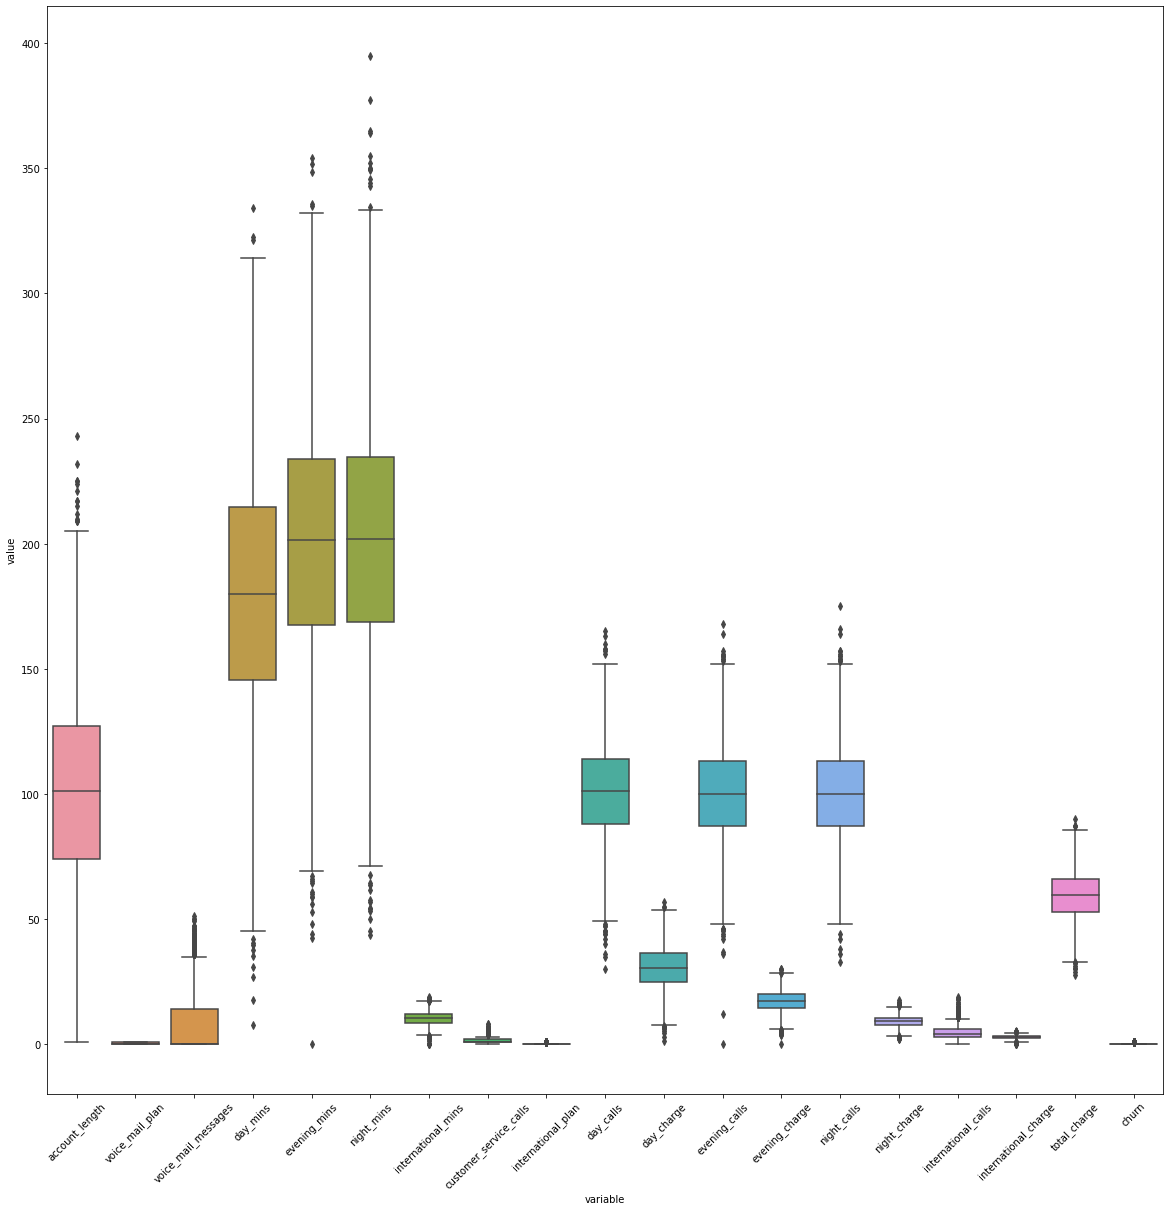

In [ ]:
df2_melt = pd.melt(df2)

plt.figure(figsize=(20,20))
sns.boxplot(x="variable", y="value", data=df2_melt)
plt.xticks(rotation=45);

# Observations :-

***1.After performing Isolation Forest we removed 334 rows from the original data which was containing the noise data points.***

#  Detecting Multicollinearity

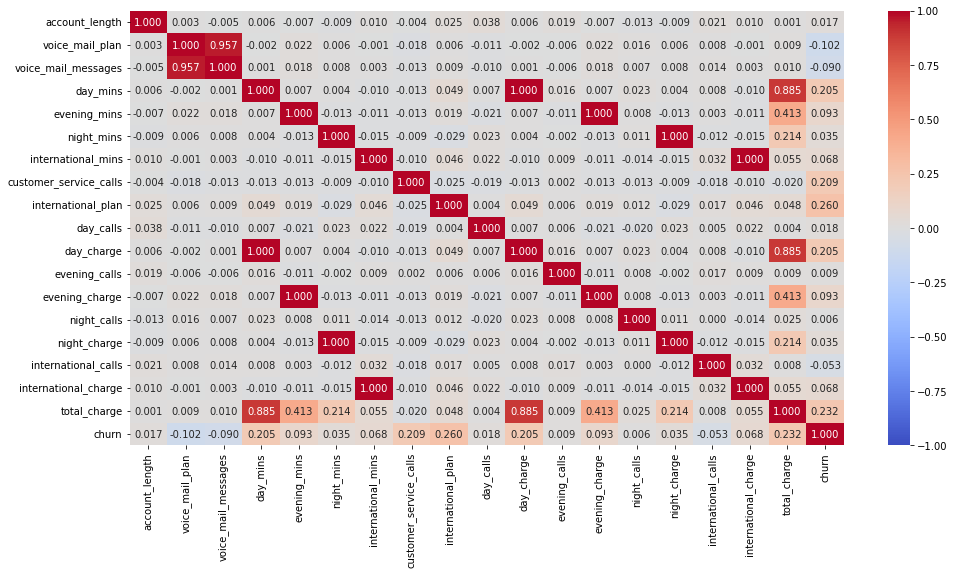

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap (tele.corr(), annot=True, fmt= '.3f', vmin=-1, vmax=1, center=0, cmap='coolwarm');

# Observations :-

1. There exist a very strong positive correlation between "voice_mail_plan" and "voice_mail_messages" with value 0.96.


2. There exist a very strong, positive, linear correlation between "day_mins" and "day_charge" with value 1.00.


3. There exist a very strong, positive, linear correlation between "evening_mins" and "evening_charge" with value 1.00.


4. There exist a very strong, positive, linear correlation between "night_mins" and "night_charge" with value 1.00.


5. There exist a very strong, positive, linear correlation between "international_mins" and "international_charge" with value 1.00.


6. There exist a strong positive correlation between "day_mins" and "total_charge" with value 0.87.


7. There exist a strong positive correlation between "day_charge" and "total_charge" with value 0.87.


8. The correlation value for rest of the features is very less (almost 0).


9. day_mins, evening_mins, customer_service_calls, day_charge, evening_charge, and total_charge having weak but positive correlation with the target variable "churn".


10. We can see in heatmap that we have some multicollinerity in our given data.

# Exploratory Data Analysis on the Dataset

## Analyzing the Given Target Value i.e., 'CHURN'

In [ ]:
#Printing the Unique value in the Churn column

tele['churn'].unique()

array([0, 1], dtype=int64)

In [ ]:
#Printing the value count of True or False in the Churn Feature

print(tele.churn.value_counts())

0    2850
1     483
Name: churn, dtype: int64


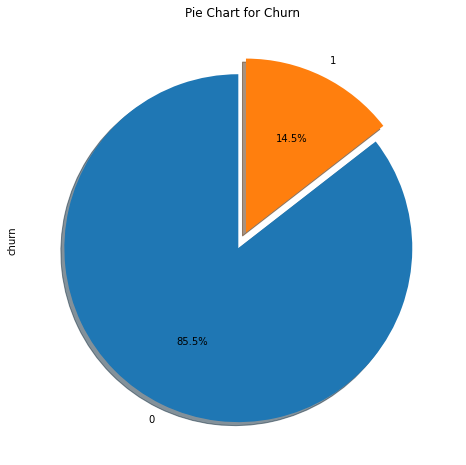

In [ ]:
#With the help of Pie-Chart we can better analyze the Churn Feature

tele['churn'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',startangle=90,shadow=True,figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

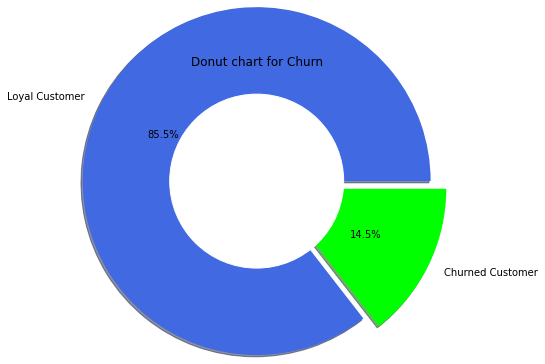

In [ ]:
#Get the Donut Plot for analysing Feature

data=tele['churn'].value_counts()
explode=(0,0.2)
plt.pie(data,explode=explode,autopct='%1.1f%%',shadow=True,radius=2.0,labels=['Loyal Customer','Churned Customer'],colors=['royalblue','lime'])
circle=plt.Circle((0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut chart for Churn')
plt.show()

***According to Pie-Chart and Donut Plot Loyal_Customers are 85.5% and Churning Customers are 14.5%***

<AxesSubplot:xlabel='churn', ylabel='count'>

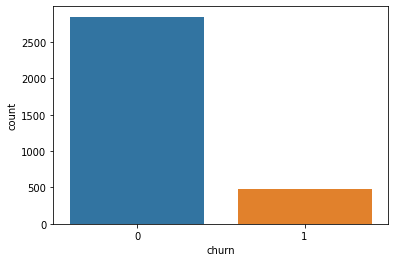

In [ ]:
#Get the count plot for analysing the feature

sns.countplot(x=tele['churn'])

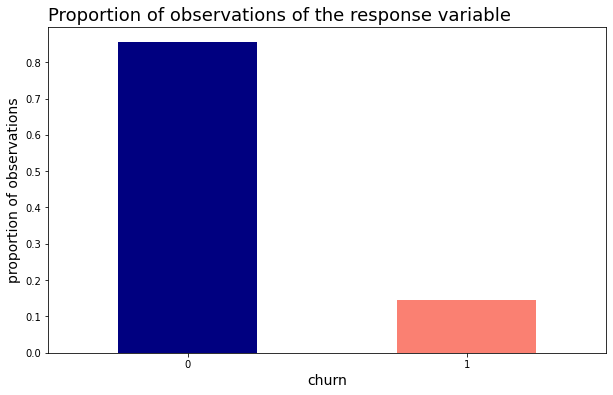

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# proportion of observation of each class

prop_response = tele["churn"].value_counts(normalize=True)

# create barplot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['navy','salmon'])

# set titles
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

****Insights :
                After analysing the 'CHURN' feature of the Telecommunication Dataset we have come to conclusion that 14.5% customers are churning****

## Analyzing account length column with targeted variable

In [ ]:
#Getting unique values from the Account_Length column

tele.account_length.unique()

array([128, 107, 137,  84,  75, 118, 121, 147, 117, 141,  65,  74, 168,
        95,  62, 161,  85,  93,  76,  73,  77, 130, 111, 132, 174,  57,
        54,  20,  49, 142, 172,  12,  72,  36,  78, 136, 149,  98, 135,
        34, 160,  64,  59, 119,  97,  52,  60,  10,  96,  87,  81,  68,
       125, 116,  38,  40,  43, 113, 126, 150, 138, 162,  90,  50,  82,
       144,  46,  70,  55, 106,  94, 155,  80, 104,  99, 120, 108, 122,
       157, 103,  63, 112,  41, 193,  61,  92, 131, 163,  91, 127, 110,
       140,  83, 145,  56, 151, 139,   6, 115, 146, 185, 148,  32,  25,
       179,  67,  19, 170, 164,  51, 208,  53, 105,  66,  86,  35,  88,
       123,  45, 100, 215,  22,  33, 114,  24, 101, 143,  48,  71, 167,
        89, 199, 166, 158, 196, 209,  16,  39, 173, 129,  44,  79,  31,
       124,  37, 159, 194, 154,  21, 133, 224,  58,  11, 109, 102, 165,
        18,  30, 176,  47, 190, 152,  26,  69, 186, 171,  28, 153, 169,
        13,  27,   3,  42, 189, 156, 134, 243,  23,   1, 205, 20

In [ ]:
churn_df     = tele[tele["churn"] == bool(True)]
not_churn_df = tele[tele["churn"] == bool(False)]

<AxesSubplot:xlabel='account_length', ylabel='Density'>

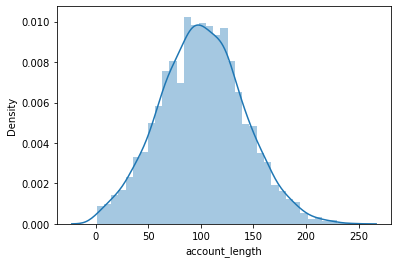

In [ ]:
sns.distplot(tele['account_length'])

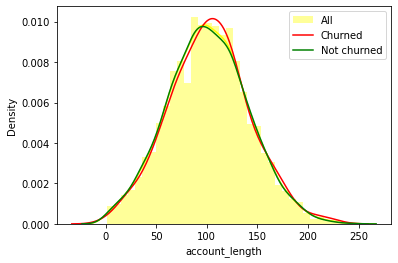

In [ ]:
#comparison of churned account length and not churned account length 
sns.distplot(tele['account_length'],color = 'yellow',label="All")
sns.distplot(churn_df['account_length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df['account_length'],color = 'green',hist= False,label="Not churned")
plt.legend()

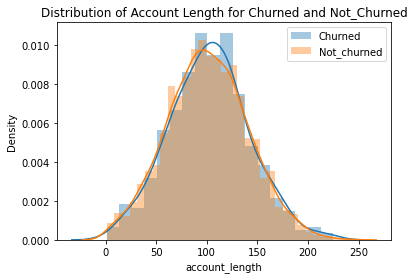

In [ ]:
account_length_churned = tele[tele['churn']==1]['account_length']
account_length_not_churned =tele[tele['churn']== 0]['account_length']
sns.distplot(account_length_churned,label='Churned')
sns.distplot(account_length_not_churned,label='Not_churned')
plt.title('Distribution of Account Length for Churned and Not_Churned')
plt.legend()
plt.show()


<AxesSubplot:xlabel='churn', ylabel='account_length'>

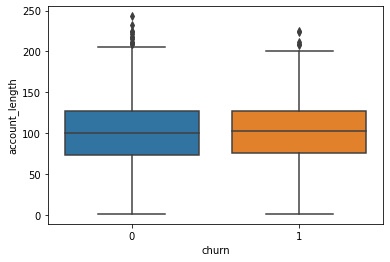

In [ ]:
sns.boxplot(x=tele.churn, y=tele.account_length)

In [ ]:
#Calculate account length vs churn percentage

data=pd.crosstab(tele['account_length'],tele['churn'])
data['Percentage_churn']=data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis=1)
print(data)
pd.set_option("display.max_rows",300)

churn           0  1  Percentage_churn
account_length                        
1               7  1              12.5
2               0  1             100.0
3               5  0               0.0
4               1  0               0.0
5               1  0               0.0
...            .. ..               ...
221             1  0               0.0
224             1  1              50.0
225             1  1              50.0
232             1  0               0.0
243             1  0               0.0

[212 rows x 3 columns]


In [ ]:
#show the most churn state of top 10 by ascending the above list
tele.groupby(['account_length'])['churn'].mean().sort_values(ascending = False).head(10)

account_length
208    1.000
2      1.000
188    1.000
225    0.500
224    0.500
212    0.500
23     0.500
17     0.500
44     0.400
24     0.375
Name: churn, dtype: float64

***Insights :*** 

***There are 212 Unique Values in Account_Length column***

 ***Highest Churning rate are from 208,02,188,225,224,212,23,17,44,24***

## Analysing Voice Mail Plan 

In [ ]:
tele['voice_mail_plan'].value_counts()

0    2411
1     922
Name: voice_mail_plan, dtype: int64

In [ ]:
data=pd.crosstab(tele['voice_mail_plan'],tele['churn'])
data['Percentage_churn']=data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis=1)
print(data)

churn               0    1  Percentage_churn
voice_mail_plan                             
0                2008  403         16.715056
1                 842   80          8.676790


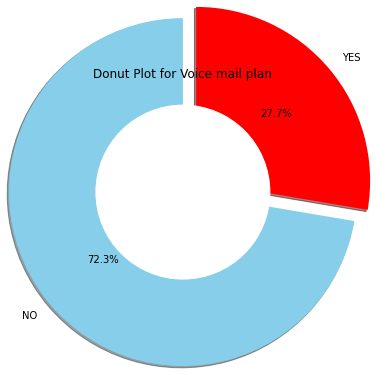

In [ ]:
#To get the Donut Plot to analyze Voice mail plan
data = tele['voice_mail_plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Voice mail plan')
plt.show()

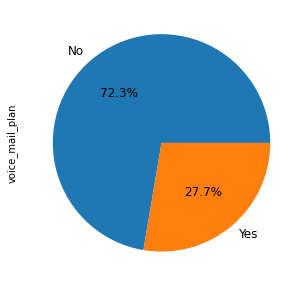

In [ ]:
bx= (tele['voice_mail_plan'].value_counts(normalize=True)*100.0)\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12)
ax.set_title('% voice_mail_plan', fontsize = 20);

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

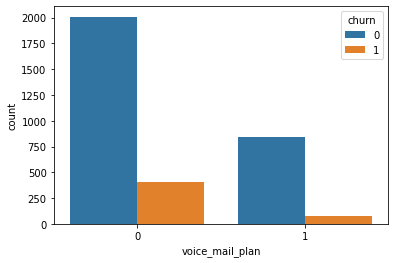

In [ ]:
#Analysing by using countplot
sns.countplot(x='voice_mail_plan',hue="churn",data = tele)

In [ ]:
tele['voice_mail_plan'].corr(tele['churn'])

-0.10214814067014706

In [ ]:
#show the most churn state of top 10 by ascending the above list
tele.groupby(['voice_mail_plan'])['churn'].mean().sort_values(ascending = False).head(10)

voice_mail_plan
0    0.167151
1    0.086768
Name: churn, dtype: float64

***There is 2411 members who doesn't have voice mail plan but the percentage churning rate is 16.71%***

***In 922 members who have Voice mail plan but churn rate is 8.6%***

***Here we can say who don't have Voice Mail Plan have High Churning Rate***

## Analysing International Plan

In [ ]:
tele['international_plan'].value_counts()

0    3010
1     323
Name: international_plan, dtype: int64

In [ ]:
tele['international_plan'].unique()

array([0, 1], dtype=int64)

In [ ]:
data=pd.crosstab(tele['international_plan'],tele['churn'])
data['percentage_churn']=data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis=1)
print(data)

churn                  0    1  percentage_churn
international_plan                             
0                   2664  346         11.495017
1                    186  137         42.414861


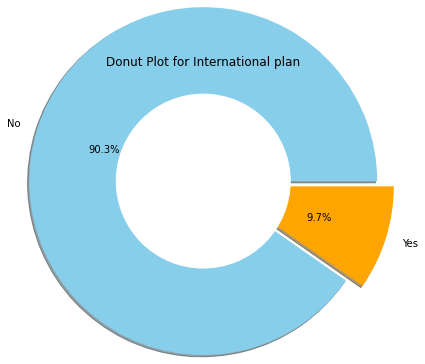

In [ ]:
#To get the Donut Plot to analyze International Plan
data = tele['international_plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['skyblue' ,'orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

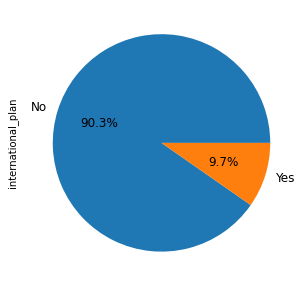

In [ ]:
cx = (tele['international_plan'].value_counts(normalize=True)*100.0)\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12)
ax.set_title('% international_plan', fontsize = 20);

<AxesSubplot:xlabel='international_plan', ylabel='count'>

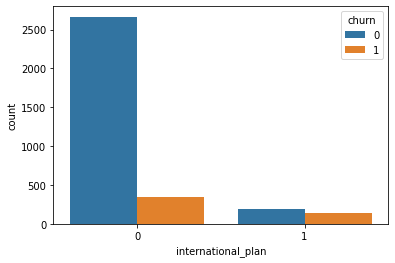

In [ ]:
#Analysing by using countplot
sns.countplot(x='international_plan',hue="churn",data = tele)

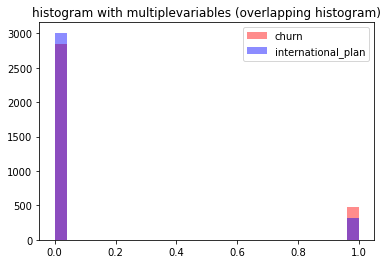

In [ ]:
# plotting two histograms on the same axis
plt.hist(tele['churn'], bins=25, alpha=0.45, color='red')
plt.hist(tele['international_plan'], bins=25, alpha=0.45, color='blue')
plt.title("histogram with multiplevariables (overlapping histogram)")
plt.legend(['churn', 
            'international_plan'])
plt.show()

In [ ]:
colors = ['#101820FF', '#F2AA4CFF']

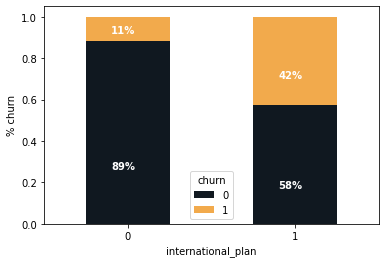

In [ ]:
contract_churn = tele.groupby(['international_plan', 'churn']).size().unstack()
contract_churn = contract_churn.T / contract_churn.T.sum()  
fig = contract_churn.T.plot(kind='bar', stacked=True, rot=0, color=['#101820FF', '#F2AA4CFF'])
fig.set_ylabel('% churn')

for patch in fig.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    # value, (x, y)
    fig.annotate('{}%'.format(round(height * 100)), (x+0.3*width, y+0.3*height), color='white', weight='bold')

***From the above data we get***

***There are 3010 customers who  dont have a international plan.***

***There are 323 customers who have a international plan.***

***Among those who have a international plan 42.4 % people churn.***

***Whereas among those who dont have a international plan only 11.4 % people churn.***

***So basically the people who bought International plans are churning in big numbers.***

***Probably because of connectivity issues or high call charge.***

### Analyzing "voice mail messages" column

In [ ]:
#Printing unique values

tele['voice_mail_messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9], dtype=int64)

In [ ]:
#printing the data of voice mail messeges

tele['voice_mail_messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: voice_mail_messages, dtype: int64

In [ ]:
#Printing the statistical values

tele['voice_mail_messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: voice_mail_messages, dtype: float64

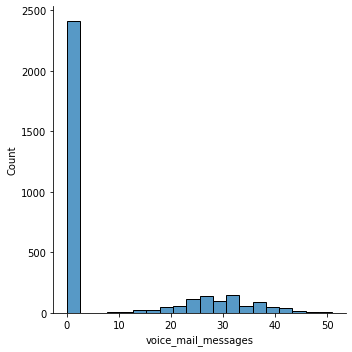

In [ ]:
#Analysing using Distplot Graph

sns.displot(tele['voice_mail_messages'])

<Figure size 720x576 with 0 Axes>

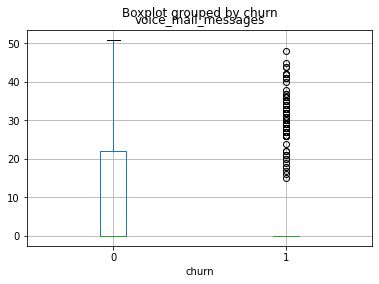

In [ ]:
#Analysing by using boxplot diagram between 'number vmail messages' and 'churn'
fig = plt.figure(figsize =(10, 8)) 
tele.boxplot(column='voice_mail_messages', by='churn')
fig.suptitle('voice_mail_messages', fontsize=14, fontweight='bold')
plt.show()

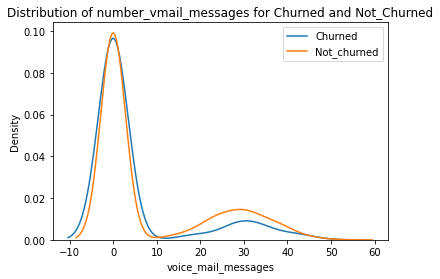

In [ ]:
voice_mail_messages_churned = tele[tele['churn']==1]['voice_mail_messages']
voice_mail_messages_not_churned =tele[tele['churn']==0]['voice_mail_messages']
sns.distplot(voice_mail_messages_churned,hist=False,label='Churned')
sns.distplot(voice_mail_messages_not_churned,hist=False,label='Not_churned')
plt.title('Distribution of number_vmail_messages for Churned and Not_Churned')
plt.legend()
plt.show()

***After analyzing the above voice mail feature data we get an insight that when there are more than 20 voice-mail messages then  there is a churn***

***For that, we need to improve the voice mail quality.***

## Analysing 'Customer Service Calls' column

In [ ]:
#Printing the data of customer service calls 

tele['customer_service_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64

In [ ]:
#Printing Unique values

tele['customer_service_calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8], dtype=int64)

In [ ]:
#Calculating the Customer service calls vs Churn percentage

data_csc=pd.crosstab(tele['customer_service_calls'],tele['churn'])
data_csc['Percentage_churn']=data_csc.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(data_csc)

churn                      0    1  Percentage_churn
customer_service_calls                             
0                        605   92         13.199426
1                       1059  122         10.330229
2                        672   87         11.462451
3                        385   44         10.256410
4                         90   76         45.783133
5                         26   40         60.606061
6                          8   14         63.636364
7                          4    5         55.555556
8                          1    1         50.000000
9                          0    2        100.000000


<AxesSubplot:>

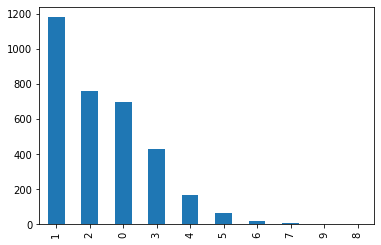

In [ ]:
tele['customer_service_calls'].value_counts().plot.bar()

<AxesSubplot:xlabel='customer_service_calls', ylabel='count'>

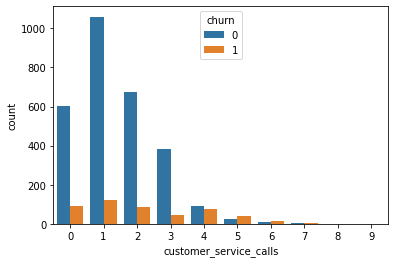

In [ ]:
#Analysing using countplot

sns.countplot(x='customer_service_calls',hue='churn',data=tele)

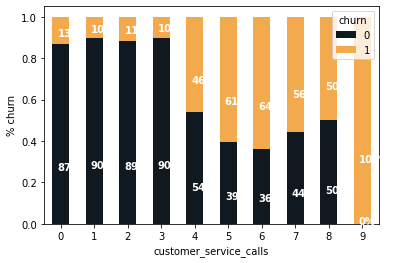

In [ ]:
contract_churn = tele.groupby(['customer_service_calls', 'churn']).size().unstack()
contract_churn = contract_churn.T / contract_churn.T.sum()  
fig = contract_churn.T.plot(kind='bar', stacked=True, rot=0, color=['#101820FF', '#F2AA4CFF'])
fig.set_ylabel('% churn')

for patch in fig.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    # value, (x, y)
    fig.annotate('{}%'.format(round(height * 100)), (x+0.3*width, y+0.3*height), color='white', weight='bold')

***It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.***

***The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,***

***And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.***

***So operator should work to improve the service call.***

## Analyzing all calls minutes,all calls, all calls charge together
***As these data sets are numerical data type, so for analysing with the 'churn' which is a catagorical data set, We are using mean, median, and box plots.***


***'day_calls','day_charge', 'evening_calls', 'evening_charge','night_calls''night_charge','international_calls', 'international_charge',
       'total_charge', 'churn'***
     

## ANALYSING DAY[ MINS,CALLS,CHARGE]

In [ ]:
#Print the mean value of churned and not churned customer

print(tele.groupby(['churn'])['day_calls'].mean())

churn
0    100.283158
1    101.335404
Name: day_calls, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer
print(tele.groupby(['churn'])['day_mins'].mean())

churn
0    175.175754
1    206.914079
Name: day_mins, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer

print(tele.groupby(['churn'])['day_charge'].mean())

churn
0    29.780421
1    35.175921
Name: day_charge, dtype: float64


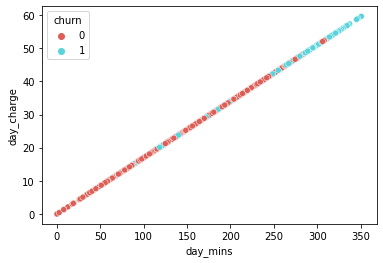

In [ ]:
#show the relation using scatter plot

sns.scatterplot(x='day_mins',y='day_charge',hue='churn',data=tele,palette='hls')
plt.show()

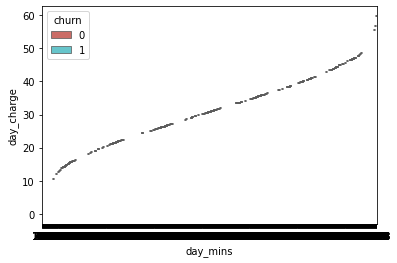

In [ ]:
#show the relation using box plot plot

sns.boxplot(x='day_mins',y='day_charge',hue='churn',data=tele,palette='hls')
plt.show()

In [ ]:
#correlation between Day mins and Day Charge

tele['day_charge'].corr(tele['churn'])

0.20515074317015378

Text(0.5, 1.0, 'Distribution of day_charge by churn')

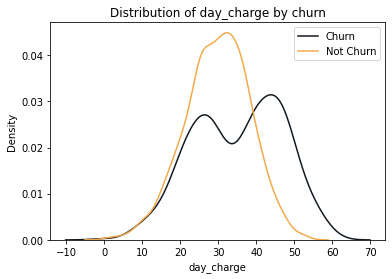

In [ ]:
fig = sns.kdeplot(tele[tele['churn'] == 1]['day_charge'], color='#101820FF')
fig = sns.kdeplot(tele[tele['churn'] == 0]['day_charge'], color='#F2AA4CFF')
fig.legend(["Churn", "Not Churn"],loc='upper right')
fig.set_title('Distribution of day_charge by churn')

***From above relation shows that Day mins and Day charge are Positively Correlated so that if a Customer using more Day_mins then the Customer has to pay more so that's why Churning rate is more. Suggested we should give some offers for retaining of Customers***

## ANALYSING EVENING[ MINS,CALLS,CHARGE]

In [ ]:
#Print the mean value of churned and not churned customer

print(tele.groupby(['churn'])['evening_calls'].mean())

churn
0    100.038596
1    100.561077
Name: evening_calls, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer
print(tele.groupby(['churn'])['evening_mins'].mean())

churn
0    199.043298
1    212.410145
Name: evening_mins, dtype: float64


In [ ]:
#Print the mean value of churned and not churned customer
print(tele.groupby(['churn'])['evening_charge'].mean())

churn
0    16.918909
1    18.054969
Name: evening_charge, dtype: float64


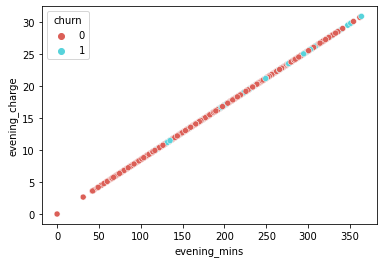

In [ ]:
#visualizing relation with scatterplot

sns.scatterplot(x='evening_mins',y='evening_charge',hue='churn',data=tele,palette='hls')
plt.show()

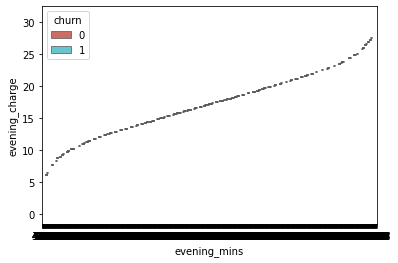

In [ ]:
sns.boxplot(x='evening_mins',y='evening_charge',hue='churn',data=tele,palette='hls')
plt.show()

In [ ]:
tele['evening_charge'].corr(tele['churn'])

0.09278603942871361

Text(0.5, 1.0, 'Distribution of evening_charge by churn')

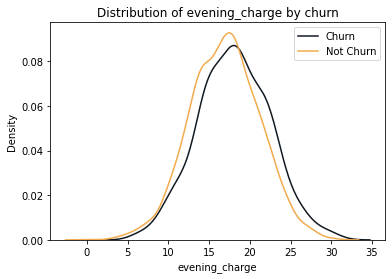

In [ ]:
fig = sns.kdeplot(tele[tele['churn'] == 1]['evening_charge'], color='#101820FF')
fig = sns.kdeplot(tele[tele['churn'] == 0]['evening_charge'], color='#F2AA4CFF')
fig.legend(["Churn", "Not Churn"],loc='upper right')
fig.set_title('Distribution of evening_charge by churn')

***It shows very low correlation between evening charge and churn so there is no much churn***

## ANALYSING NIGHT[ MINS,CALLS,CHARGE]

In [ ]:
print(tele.groupby(['churn'])['night_calls'].mean())

churn
0    100.058246
1    100.399586
Name: night_calls, dtype: float64


In [ ]:
print(tele.groupby(['churn'])['night_mins'].mean())

churn
0    200.133193
1    205.231677
Name: night_mins, dtype: float64


In [ ]:
print(tele.groupby(['churn'])['night_charge'].mean())

churn
0    9.006074
1    9.235528
Name: night_charge, dtype: float64


<AxesSubplot:xlabel='night_mins', ylabel='night_charge'>

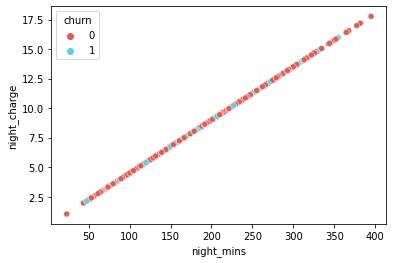

In [ ]:
#Visualizing Scatter plot
sns.scatterplot(x='night_mins',y='night_charge',hue='churn',data=tele,palette='hls')

<AxesSubplot:xlabel='night_mins', ylabel='night_charge'>

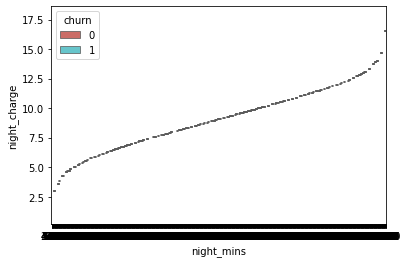

In [ ]:
#Visualizing Box PLot

sns.boxplot(x='night_mins',y='night_charge',hue='churn',data=tele,palette='hls')

In [ ]:
tele['night_charge'].corr(tele['churn'])

0.035495556240506716

Text(0.5, 1.0, 'Distribution of night_charge by churn')

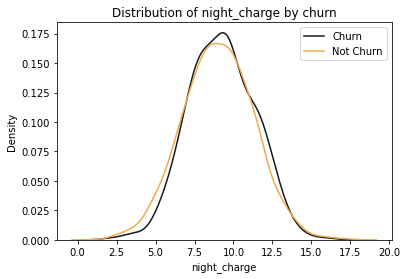

In [ ]:
fig = sns.kdeplot(tele[tele['churn'] == 1]['night_charge'], color='#101820FF')
fig = sns.kdeplot(tele[tele['churn'] == 0]['night_charge'], color='#F2AA4CFF')
fig.legend(["Churn", "Not Churn"],loc='upper right')
fig.set_title('Distribution of night_charge by churn')

***There is no churning rate with night charge***

## ANALYSING International[ MINS,CALLS,CHARGE]

In [ ]:
print(tele.groupby(['churn'])['international_calls'].mean())

churn
0    4.532982
1    4.163561
Name: international_calls, dtype: float64


In [ ]:
print(tele.groupby(['churn'])['international_mins'].mean())

churn
0    10.158877
1    10.700000
Name: international_mins, dtype: float64


In [ ]:
print(tele.groupby(['churn'])['international_charge'].mean())

churn
0    2.743404
1    2.889545
Name: international_charge, dtype: float64


<AxesSubplot:xlabel='international_mins', ylabel='international_charge'>

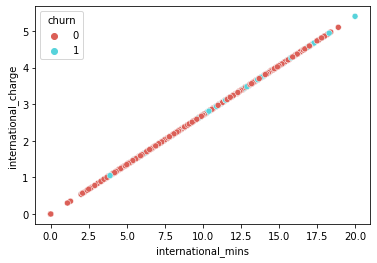

In [ ]:
#Visualizing with scatterplot
sns.scatterplot(x='international_mins',y='international_charge',hue='churn',data=tele,palette='hls')

<AxesSubplot:xlabel='international_mins', ylabel='international_charge'>

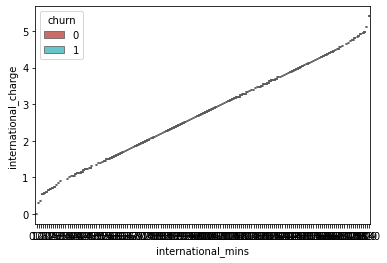

In [ ]:
#Visualizing box plot
sns.boxplot(x='international_mins',y='international_charge',hue='churn',data=tele,palette='hls')

In [ ]:
tele['international_charge'].corr(tele['churn'])

0.068258631503915

In [ ]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge_perm = tele['day_charge'].mean()/tele['day_mins'].mean()
eve_charge_perm = tele['evening_charge'].mean()/tele['evening_mins'].mean()
night_charge_perm = tele['night_charge'].mean()/tele['night_mins'].mean()
int_charge_perm= tele['international_charge'].mean()/tele['international_mins'].mean()

In [ ]:
print([day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

[0.17000300739130672, 0.08500104871485778, 0.04500041448440008, 0.2700500279887107]


Text(0.5, 1.0, 'Distribution of  total_charge by churn')

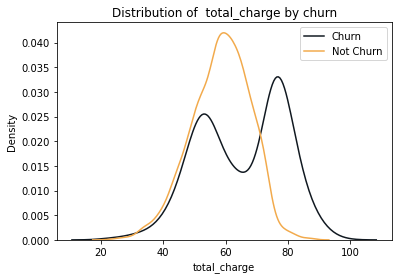

In [ ]:
fig = sns.kdeplot(tele[tele['churn'] == 1]['total_charge'], color='#101820FF')
fig = sns.kdeplot(tele[tele['churn'] == 0]['total_charge'], color='#F2AA4CFF')
fig.legend(["Churn", "Not Churn"],loc='upper right')
fig.set_title('Distribution of  total_charge by churn')

<AxesSubplot:>

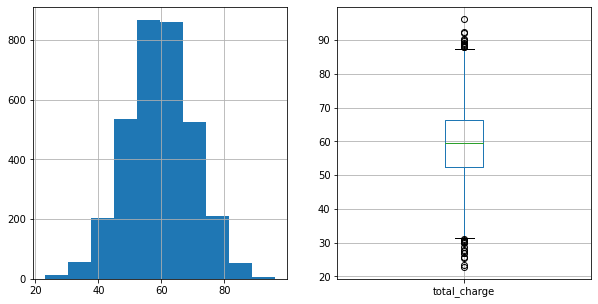

In [ ]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
tele['total_charge'].hist(ax=ax1)
ax2=plt.subplot(1,2,2)
tele.boxplot(column=['total_charge'],ax=ax2)

<AxesSubplot:>

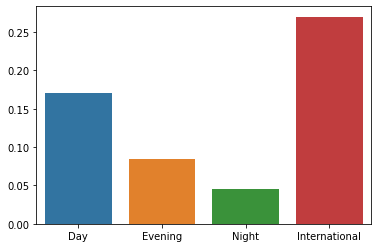

In [ ]:
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

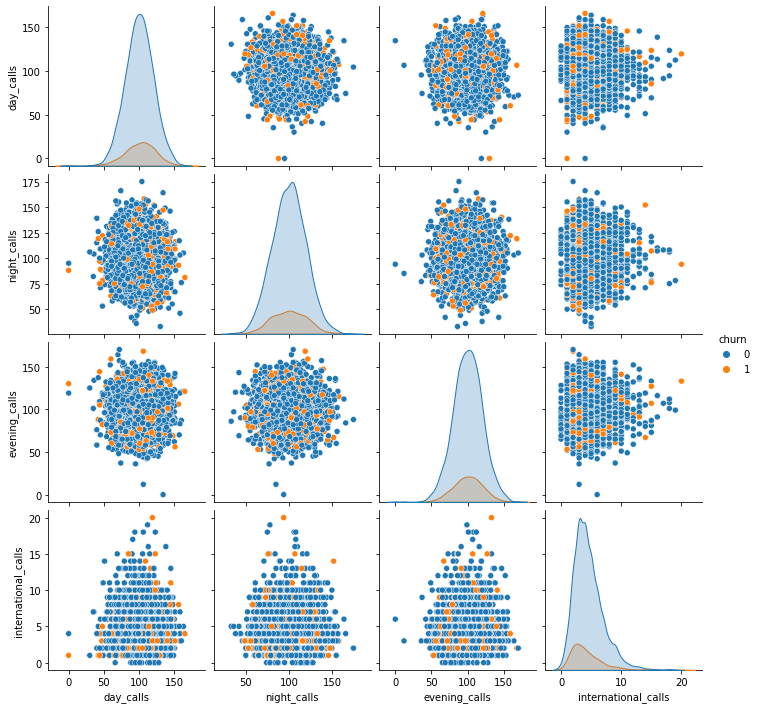

In [ ]:
sns.pairplot(tele, vars= ['day_calls','night_calls','evening_calls', 'international_calls',], hue='churn')

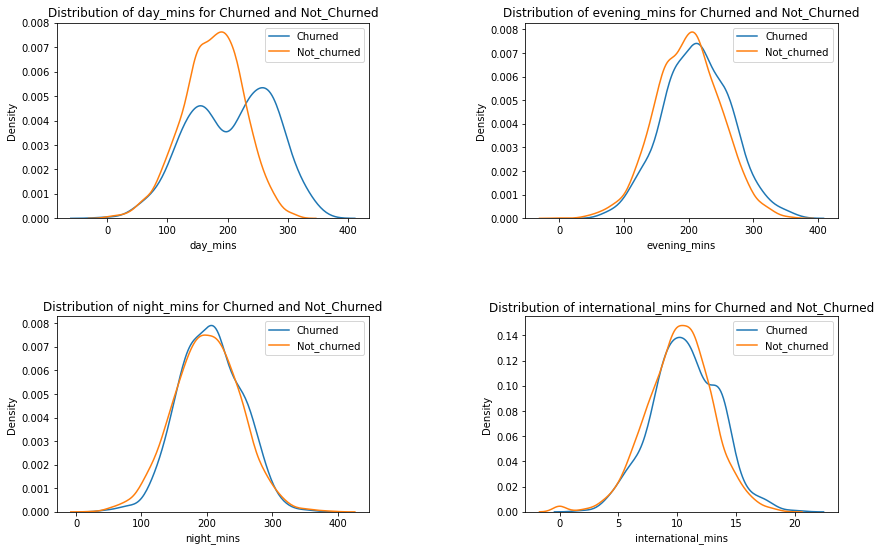

In [ ]:


fig = plt.figure(figsize=(14,9))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(2,2,1)
day_mins_churned = tele[tele['churn']==1]['day_mins']
day_mins_not_churned =tele[tele['churn']==0]['day_mins']
sns.distplot(day_mins_churned,hist=False,label='Churned')
sns.distplot(day_mins_not_churned,hist=False,label='Not_churned')
plt.title('Distribution of day_mins for Churned and Not_Churned')
plt.legend()

plt.subplot(2,2,2)
evening_mins_churned = tele[tele['churn']==1]['evening_mins']
evening_mins_not_churned =tele[tele['churn']==0]['evening_mins']
sns.distplot(evening_mins_churned,hist=False,label='Churned')
sns.distplot(evening_mins_not_churned,hist=False,label='Not_churned')
plt.title('Distribution of evening_mins for Churned and Not_Churned')
plt.legend()

plt.subplot(2,2,3)
night_mins_churned = tele[tele['churn']==1]['night_mins']
night_mins_not_churned =tele[tele['churn']==0]['night_mins']
sns.distplot(night_mins_churned,hist=False,label='Churned')
sns.distplot(night_mins_not_churned,hist=False,label='Not_churned')
plt.title('Distribution of night_mins for Churned and Not_Churned')
plt.legend()

plt.subplot(2,2,4)
international_mins_churned = tele[tele['churn']==1]['international_mins']
international_mins_not_churned =tele[tele['churn']==0]['international_mins']
sns.distplot(international_mins_churned,hist=False,label='Churned')
sns.distplot(international_mins_not_churned,hist=False,label='Not_churned')
plt.title('Distribution of international_mins for Churned and Not_Churned')
plt.legend()


plt.show()

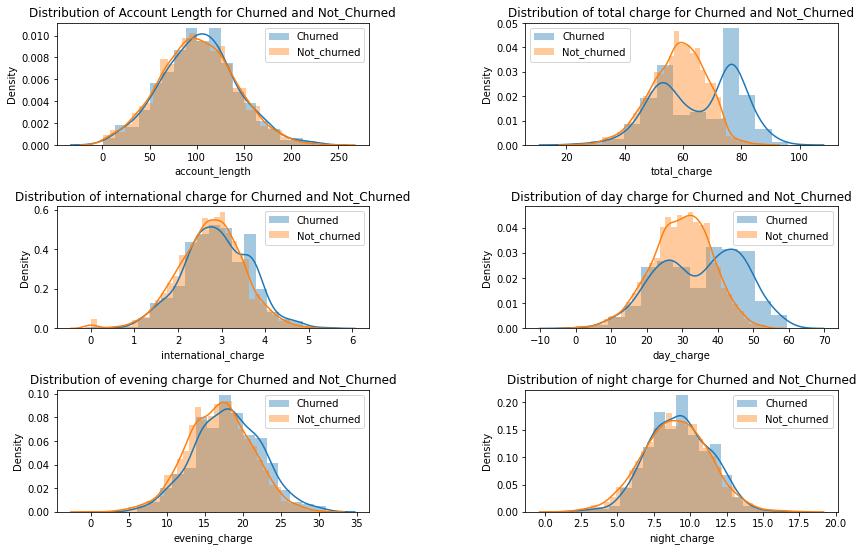

In [ ]:
fig = plt.figure(figsize=(14,9))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(3,2,1)
account_length_churned = tele[tele['churn']==1]['account_length']
account_length_not_churned =tele[tele['churn']== 0]['account_length']
sns.distplot(account_length_churned,label='Churned')
sns.distplot(account_length_not_churned,label='Not_churned')
plt.title('Distribution of Account Length for Churned and Not_Churned')
plt.legend()

plt.subplot(3,2,2)
total_charge_churned = tele[tele['churn']==1]['total_charge']
total_charge_not_churned =tele[tele['churn']== 0]['total_charge']
sns.distplot(total_charge_churned,label='Churned')
sns.distplot(total_charge_not_churned,label='Not_churned')
plt.title('Distribution of total charge for Churned and Not_Churned')
plt.legend()

plt.subplot(3,2,3)
international_charge_churned = tele[tele['churn']==1]['international_charge']
international_charge_not_churned =tele[tele['churn']== 0]['international_charge']
sns.distplot(international_charge_churned,label='Churned')
sns.distplot(international_charge_not_churned,label='Not_churned')
plt.title('Distribution of international charge for Churned and Not_Churned')
plt.legend()

plt.subplot(3,2,4)
day_charge_churned = tele[tele['churn']==1]['day_charge']
day_charge_not_churned =tele[tele['churn']== 0]['day_charge']
sns.distplot(day_charge_churned,label='Churned')
sns.distplot(day_charge_not_churned,label='Not_churned')
plt.title('Distribution of day charge for Churned and Not_Churned')
plt.legend()

plt.subplot(3,2,5)
evening_charge_churned = tele[tele['churn']==1]['evening_charge']
evening_charge_not_churned =tele[tele['churn']== 0]['evening_charge']
sns.distplot(evening_charge_churned,label='Churned')
sns.distplot(evening_charge_not_churned,label='Not_churned')
plt.title('Distribution of evening charge for Churned and Not_Churned')
plt.legend()

plt.subplot(3,2,6)
night_charge_churned = tele[tele['churn']==1]['night_charge']
night_charge_not_churned =tele[tele['churn']== 0]['night_charge']
sns.distplot(night_charge_churned,label='Churned')
sns.distplot(night_charge_not_churned,label='Not_churned')
plt.title('Distribution of night charge for Churned and Not_Churned')
plt.legend()
plt.show()


<AxesSubplot:xlabel='international_plan'>

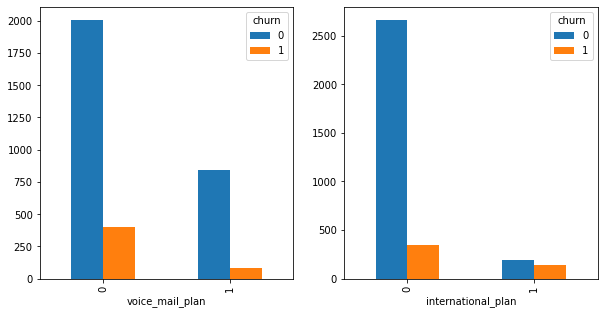

In [ ]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
pd.crosstab(tele.voice_mail_plan,tele.churn).plot(kind="bar",ax=ax1)
ax2=plt.subplot(1,2,2)
pd.crosstab(tele.international_plan,tele.churn).plot(kind = "bar",ax=ax2)

***As per analysis we have noticed that International calls and day calls are having more churn rate so we have to give some offers if we want to retain customers***

# Graphical Analysis

<Figure size 1224x72 with 0 Axes>

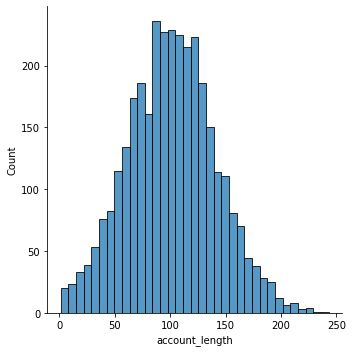

<Figure size 1224x72 with 0 Axes>

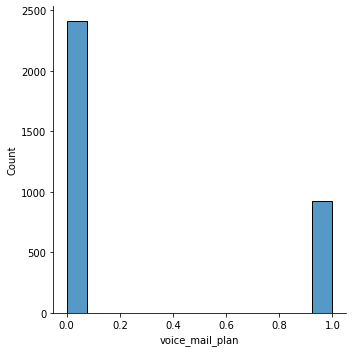

<Figure size 1224x72 with 0 Axes>

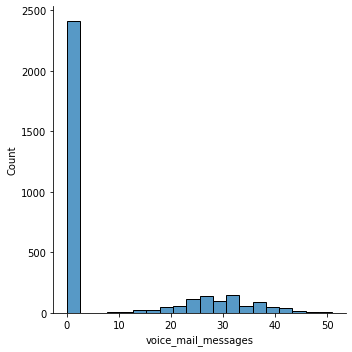

<Figure size 1224x72 with 0 Axes>

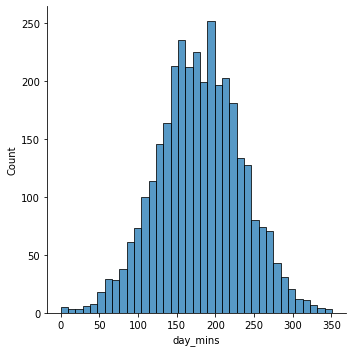

<Figure size 1224x72 with 0 Axes>

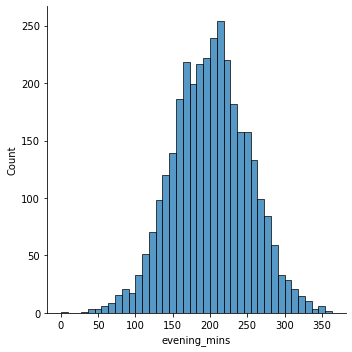

<Figure size 1224x72 with 0 Axes>

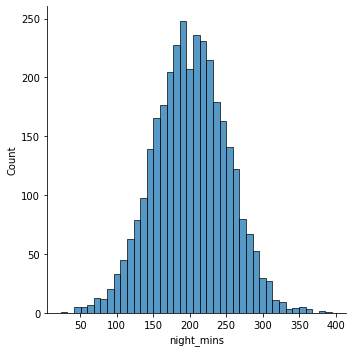

<Figure size 1224x72 with 0 Axes>

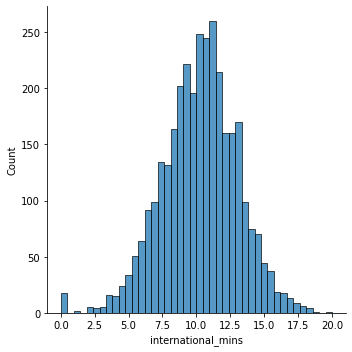

<Figure size 1224x72 with 0 Axes>

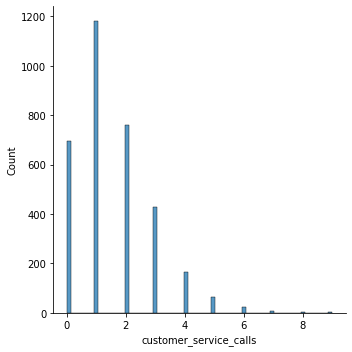

<Figure size 1224x72 with 0 Axes>

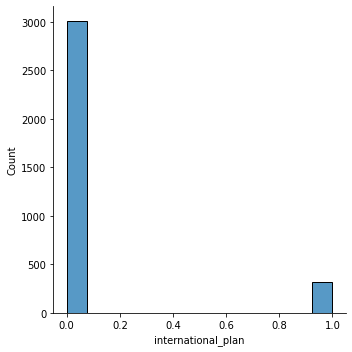

<Figure size 1224x72 with 0 Axes>

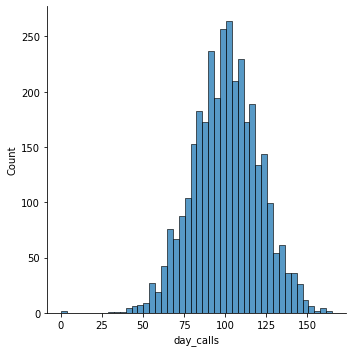

<Figure size 1224x72 with 0 Axes>

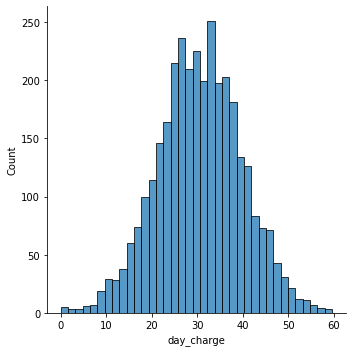

<Figure size 1224x72 with 0 Axes>

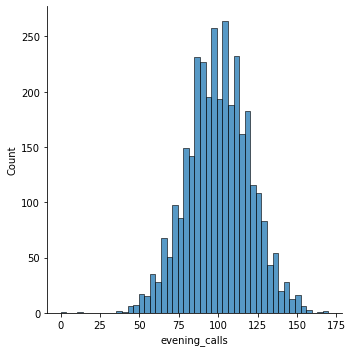

<Figure size 1224x72 with 0 Axes>

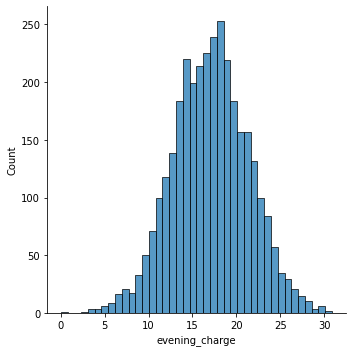

<Figure size 1224x72 with 0 Axes>

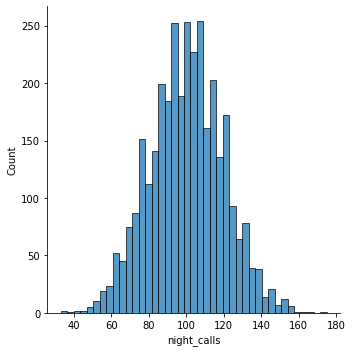

<Figure size 1224x72 with 0 Axes>

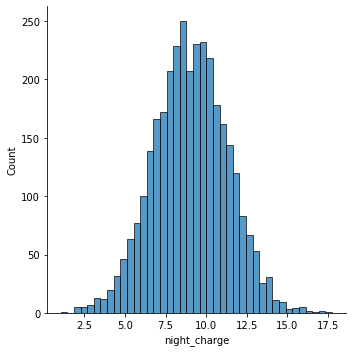

<Figure size 1224x72 with 0 Axes>

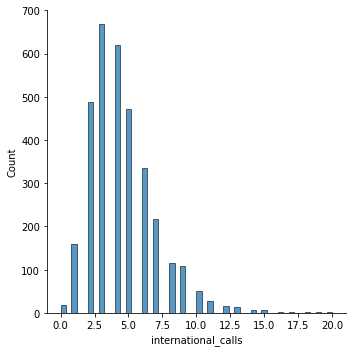

<Figure size 1224x72 with 0 Axes>

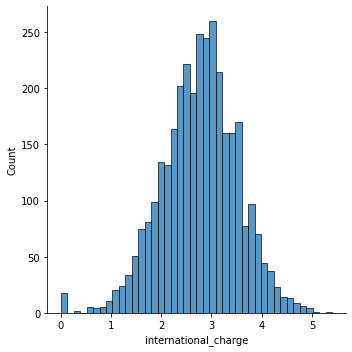

<Figure size 1224x72 with 0 Axes>

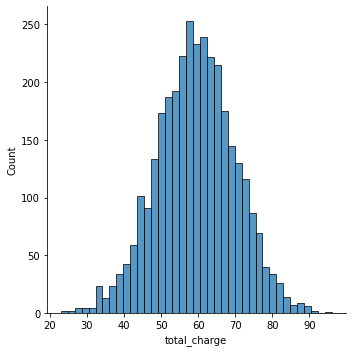

<Figure size 1224x72 with 0 Axes>

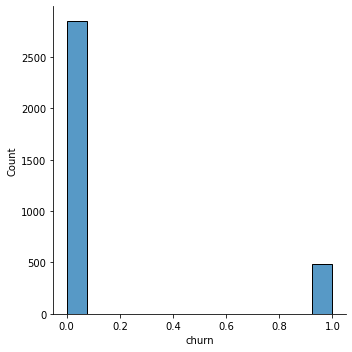

In [ ]:
#Printing displot for each numerical column present in the data set
df3=tele.select_dtypes(exclude=['object','bool'])
for column in df3:
        plt.figure(figsize=(17,1))
        sns.displot(data=df3, x=column)
plt.show()

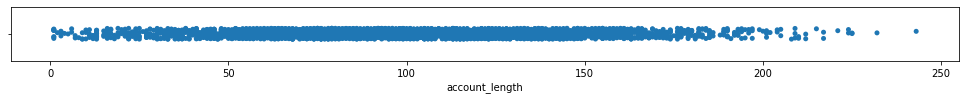

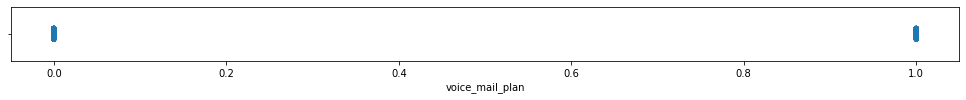

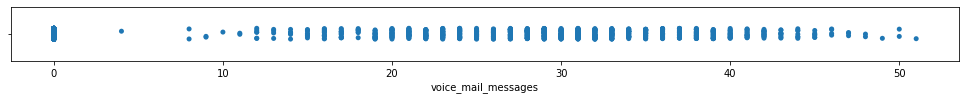

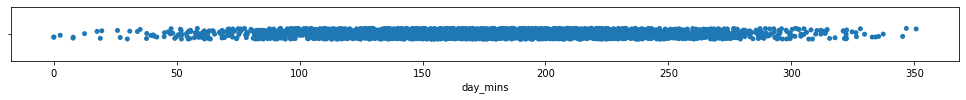

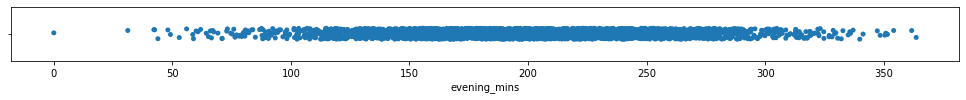

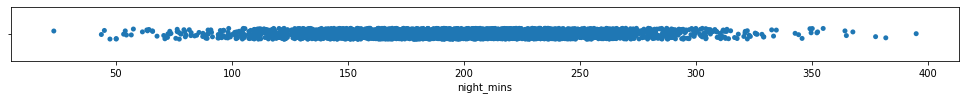

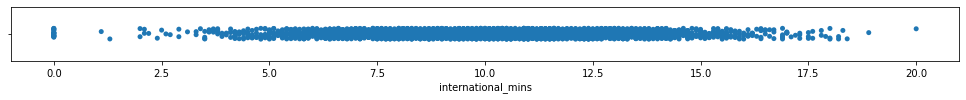

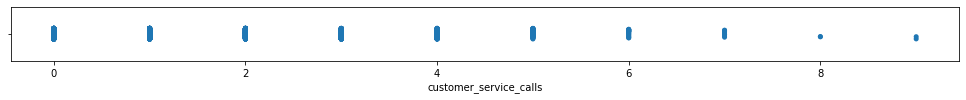

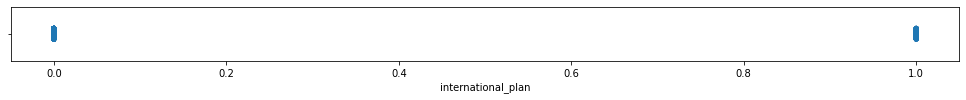

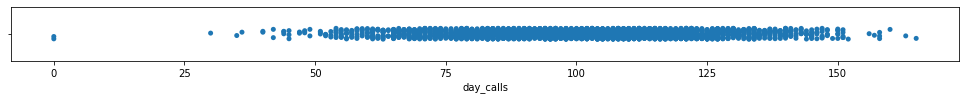

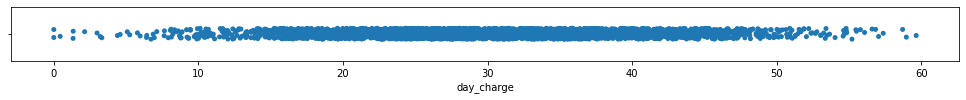

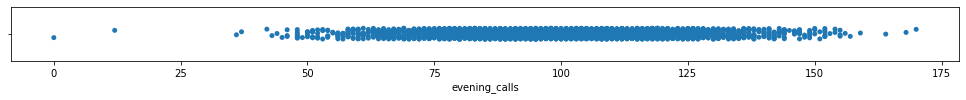

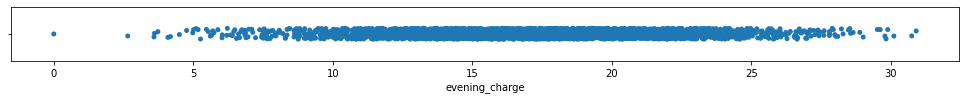

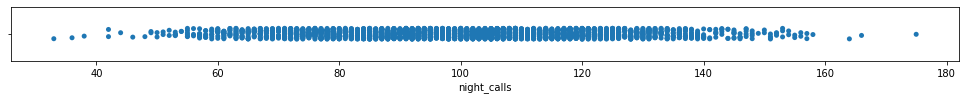

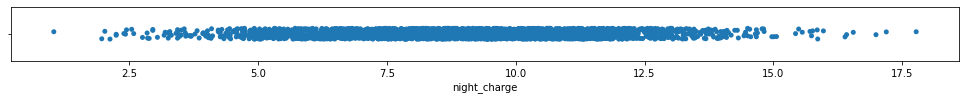

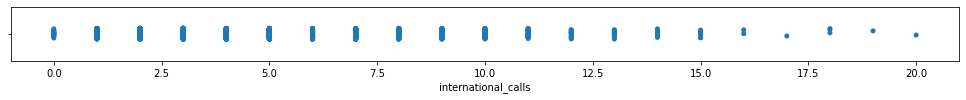

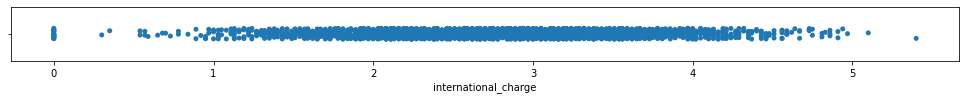

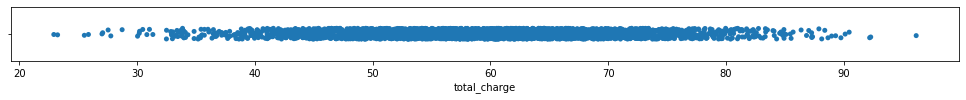

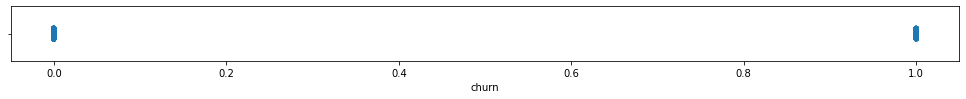

In [ ]:
#Printing stripplot for each numerical column present in the data set
df3=tele.select_dtypes(exclude=['object','bool'])
for column in df3:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df3, x=column)
plt.show()

<AxesSubplot:>

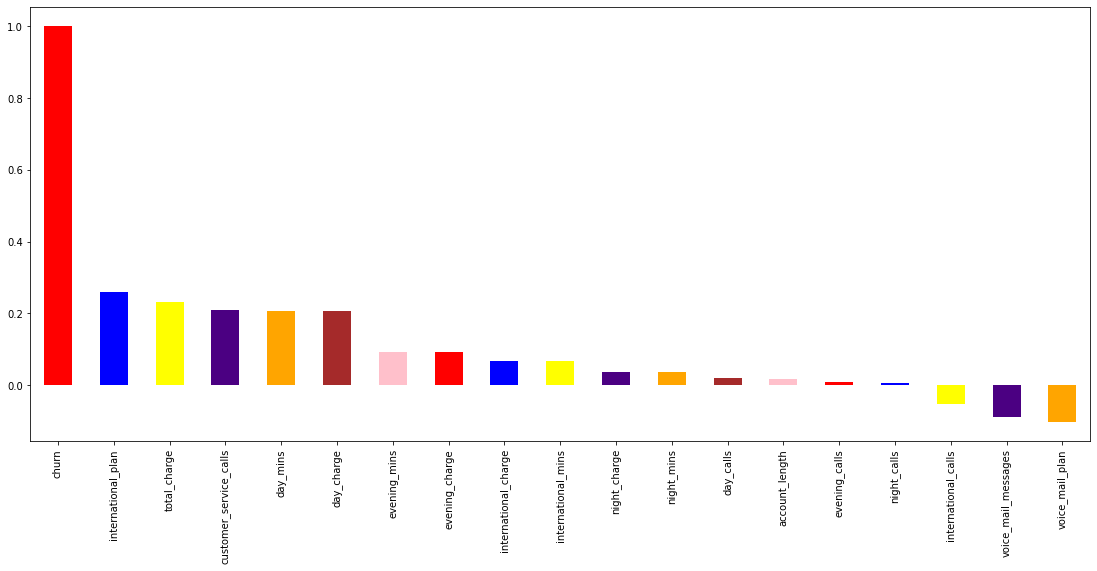

In [ ]:
# visualization using correlation plot
plt.figure(figsize=(19,8))
tele.corr()['churn'].sort_values(ascending = False).plot(kind='bar',color = ['red','blue','yellow','indigo','orange','brown','pink'])

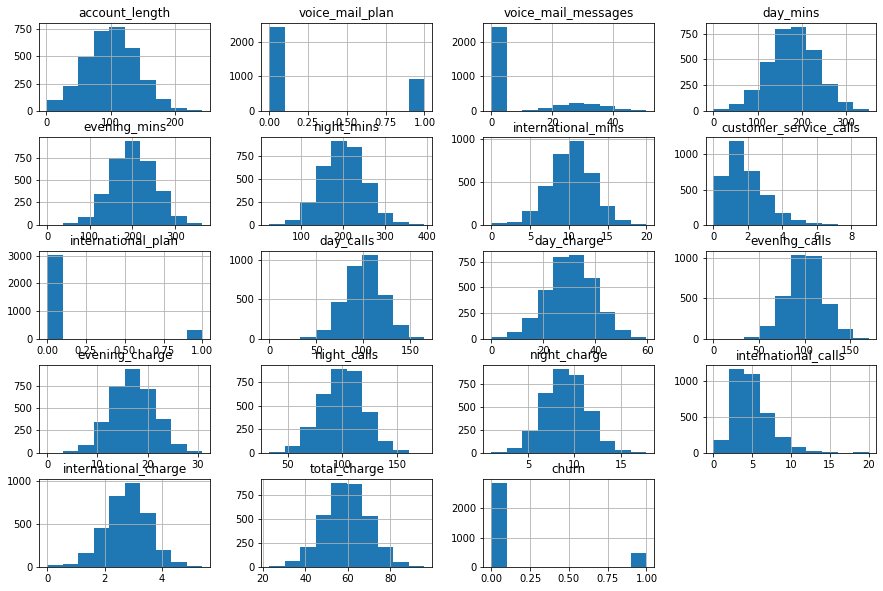

In [ ]:
# Univariate Histograms
from matplotlib import pyplot
tele.hist(figsize=(15,10))
pyplot.show()

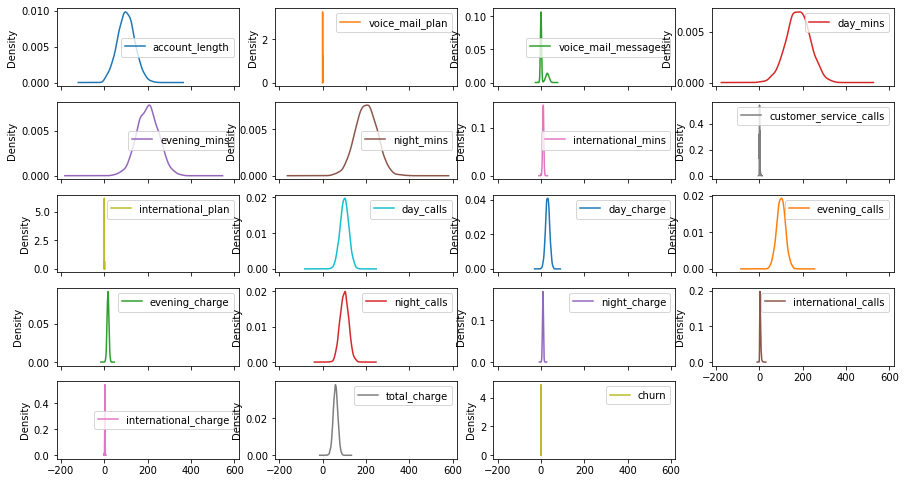

In [ ]:
# UNivariate density plot
tele.plot(kind = 'density', subplots = True, layout = (6,4), figsize=(15,10))
pyplot.show()

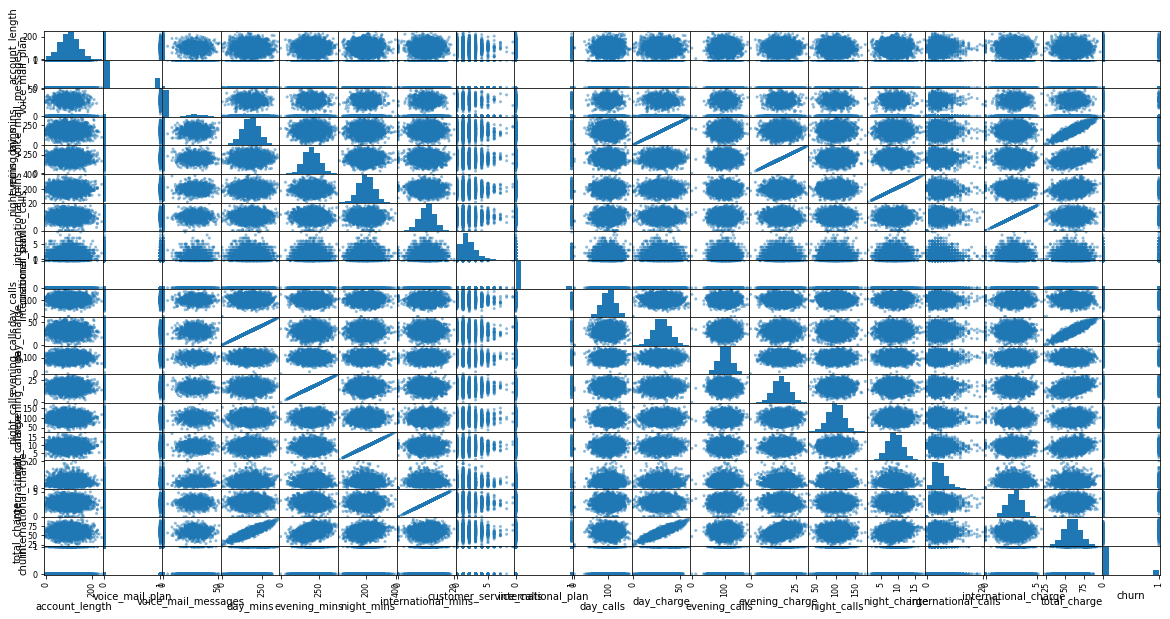

In [ ]:
# scatterplot
from pandas.plotting import scatter_matrix
scatter_matrix(tele,figsize=(20,10))
pyplot.show()

***Insights:***


***Day charge and day minutes are highly correlated***

***Evening charge and Evening minutes are highly correlated***

***Night charge and Night minutes are highly correlated***

***International charge and International minutes are highly correlated***







***CHURN VARIABLE CORRELATION WITH INDEPENDENT VARIABLES:***

***Day mins : 21%***

***Customer Service Calls : 21%***

***International Plans : 21%***

***Day Charge : 21%***

***Total Charge : 23%***

# CONCLUSION :

***International plan those customers who have this plan are churn more and also the international calling charges are also high so the customer who has the plan unsatisfied with network issues and high call charge.***


***voice mail section when there are more than 20 voice-mail messages then there is a churn so it basically means that the quality of voice mail is not good.***


***Day Mins and Day Charge are having 21% of Churning Rate because High Charge are paying by the customers.***


***In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.***

# Recommendations :

***Improve Customer Service Quality so that Customer problem Resolve as soon as possible.***

***In international plan provide some discount plan to the customer.***

***Improve the voice mail quality or take feedback from the customer.***

***Give best offers at Day time with comprimising with Profits.***

# OVER SAMPLING THE IMBALANCED DATA

In [ ]:
tele_s=tele.copy()

In [ ]:
tele_s['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

<AxesSubplot:>

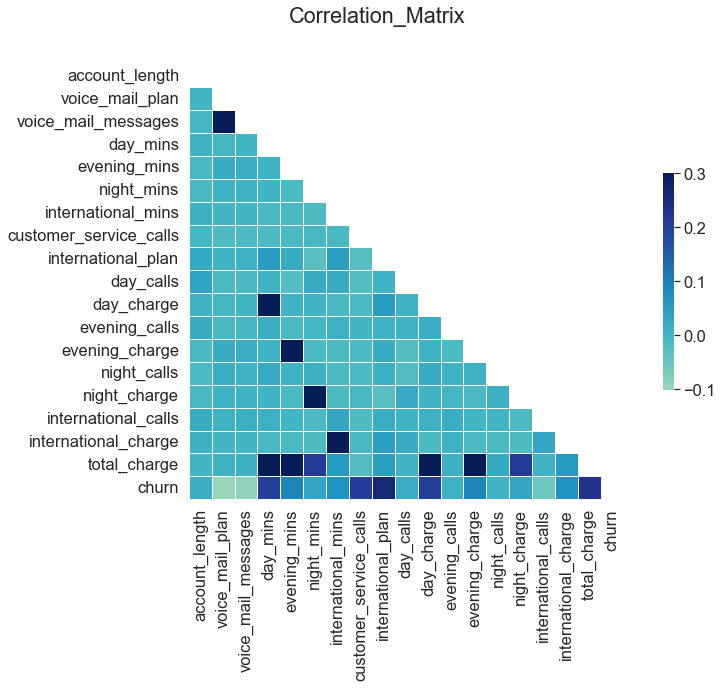

In [ ]:
sns.set(style="white", font_scale =1.5)
corr = tele_s.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
tele_s.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [ ]:
data=tele_s.drop(['voice_mail_plan','day_mins','evening_mins','night_mins','international_mins',
                  'day_charge','evening_charge','night_charge'],axis=1)
data.tail(10).T

,3323,3324,3325,3326,3327,3328,3329,3330,3331,3332
account_length,117.00,159.00,78.00,96.00,79.00,192.00,68.00,28.00,184.00,74.00
voice_mail_messages,0.00,0.00,0.00,0.00,0.00,36.00,0.00,0.00,0.00,25.00
customer_service_calls,5.00,1.00,2.00,1.00,2.00,2.00,3.00,2.00,2.00,0.00
international_plan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
day_calls,126.00,114.00,99.00,128.00,98.00,77.00,57.00,109.00,105.00,113.00
evening_calls,97.00,105.00,88.00,87.00,68.00,126.00,55.00,58.00,84.00,82.00
night_calls,56.00,82.00,109.00,92.00,128.00,83.00,123.00,91.00,137.00,77.00
international_calls,3.00,4.00,4.00,7.00,5.00,6.00,4.00,6.00,10.00,4.00
international_charge,3.67,3.13,2.51,4.02,3.19,2.67,2.59,3.81,1.35,3.70
total_charge,55.21,57.52,56.28,54.40,52.17,60.10,63.53,67.74,57.53,77.01


In [ ]:
data.dtypes

account_length              int64
voice_mail_messages         int64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
evening_calls               int64
night_calls                 int64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [ ]:
data.columns

Index(['account_length', 'voice_mail_messages', 'customer_service_calls',
       'international_plan', 'day_calls', 'evening_calls', 'night_calls',
       'international_calls', 'international_charge', 'total_charge', 'churn'],
      dtype='object')

<AxesSubplot:>

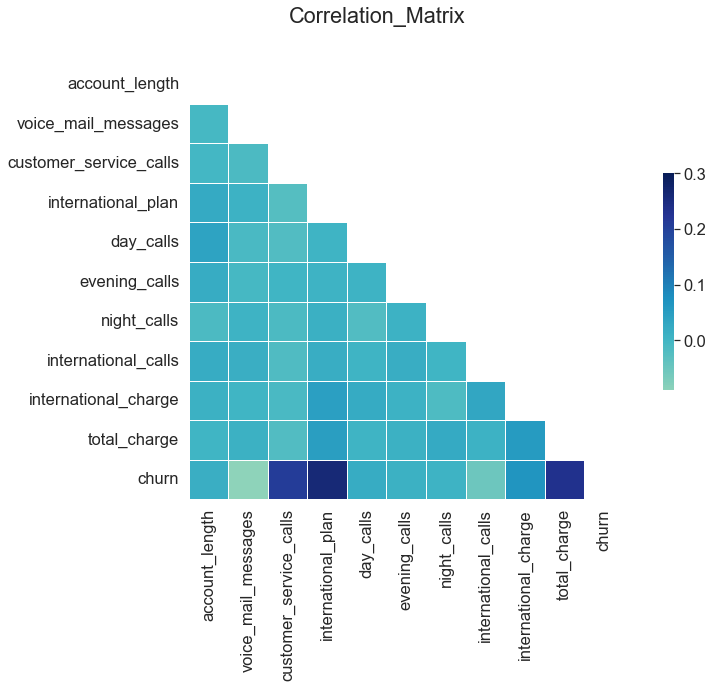

In [ ]:
sns.set(style="white", font_scale =1.5)
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
x= data.drop('churn',axis='columns')
y= tele_s['churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X, Y = smote.fit_resample(x, y)


In [ ]:
Y.value_counts()

0    2850
1    2850
Name: churn, dtype: int64

# FEATURE SCALING

In [ ]:
X.sample(10).T

,3825,3156,1434,1699,1948,5172,4419,2238,3931,863
account_length,81.000000,64.00,47.00,133.00,128.00,94.000000,71.000000,61.00,60.000000,45.00
voice_mail_messages,0.000000,0.00,37.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00
customer_service_calls,3.000000,3.00,2.00,4.00,1.00,1.000000,2.000000,1.00,1.000000,1.00
international_plan,0.000000,0.00,0.00,0.00,0.00,1.000000,0.000000,0.00,0.000000,0.00
day_calls,68.000000,97.00,150.00,133.00,105.00,85.000000,109.000000,104.00,102.000000,71.00
evening_calls,96.000000,97.00,97.00,140.00,106.00,111.000000,92.000000,131.00,115.000000,94.00
night_calls,97.000000,89.00,112.00,84.00,114.00,87.000000,126.000000,106.00,76.000000,125.00
international_calls,2.000000,1.00,6.00,3.00,2.00,1.000000,4.000000,4.00,3.000000,13.00
international_charge,4.651667,2.81,3.56,2.27,1.84,2.993681,2.839764,4.67,3.242895,3.35
total_charge,54.185510,48.18,51.51,60.76,59.23,63.282542,85.285578,75.79,83.309822,61.42


In [ ]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
5695    1
5696    1
5697    1
5698    1
5699    1
Name: churn, Length: 5700, dtype: int64

# Data Rescaling

In [ ]:
# 1.for data having categorical or discrete vales
# Rescale data (between X and Y) # Normalizing data
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data.values
#separate array into input and output components
X = array[:,0:10]
Y = array[:,10]
scaler = MinMaxScaler(feature_range = (0,1))
rescaledx = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledx[0:5,:])

[[0.52 0.49 0.11 0.   0.67 0.58 0.41 0.15 0.5  0.72]
 [0.44 0.51 0.11 0.   0.75 0.61 0.49 0.15 0.69 0.5 ]
 [0.56 0.   0.   0.   0.69 0.65 0.5  0.25 0.61 0.54]
 [0.34 0.   0.22 1.   0.43 0.52 0.39 0.35 0.33 0.6 ]
 [0.31 0.   0.33 1.   0.68 0.72 0.62 0.15 0.51 0.4 ]]


# Data Standardization

In [ ]:
# for data having continuous columns
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledx[0:5,:])

[[0.525 0.49  0.111 0.    0.667 0.582 0.408 0.15  0.5   0.719]
 [0.438 0.51  0.111 0.    0.745 0.606 0.493 0.15  0.685 0.496]
 [0.562 0.    0.    0.    0.691 0.647 0.5   0.25  0.609 0.538]
 [0.343 0.    0.222 1.    0.43  0.518 0.394 0.35  0.33  0.599]
 [0.306 0.    0.333 1.    0.685 0.718 0.62  0.15  0.506 0.398]]


# Feature Engineering Methods

# 1. Recursive Feature Elimination

In [ ]:
# 1. Feature Extraction with Recursive Feature Elimination (RFE)
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression # you can use any model regression or classification
array = data.values
X = array[:,0:10]
Y = array[:,10]
# feature extraction
model = LogisticRegression(max_iter=400) # how many time it should repeated

rfe = RFE(model)                      # any model can use
fit = rfe.fit(X, Y)

fit.n_features_

5

In [ ]:
fit.support_

array([False, False,  True,  True, False, False, False,  True,  True,
        True])

In [ ]:
fit.ranking_


array([5, 2, 1, 1, 3, 4, 6, 1, 1, 1])

In [ ]:
imp_feature = pd.DataFrame()
imp_feature["Columns"] = data.columns
imp_feature['Score'] = pd.Series(fit.ranking_)
imp_feature.sort_values(["Score"])

,Columns,Score
2,customer_service_calls,1.0
3,international_plan,1.0
7,international_calls,1.0
8,international_charge,1.0
9,total_charge,1.0
1,voice_mail_messages,2.0
4,day_calls,3.0
5,evening_calls,4.0
0,account_length,5.0
6,night_calls,6.0


# 2.Feature Importance using Decision Tree

In [ ]:
# 2. Feature Importance with Extra Trees Classifier
# Feature Importance using Decision Tree

from pandas import read_csv
from sklearn.tree import  DecisionTreeClassifier

array = data.values
X = array[:,0:10]
Y = array[:,10]

# feature extraction
model = DecisionTreeClassifier()
model.fit(X,y)

print(model.feature_importances_)

[0.023 0.118 0.115 0.069 0.023 0.011 0.015 0.086 0.11  0.431]


# 3. Univariate Feature Selection

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

test_1 = SelectKBest(score_func=chi2, k=10)
fit = test_1.fit(X,Y)

set_printoptions(precision=3)
print(fit.scores_)

[1.430e+01 6.206e+02 1.608e+02 2.032e+02 4.553e+00 1.126e+00 4.807e-01
 1.258e+01 3.191e+00 3.314e+02]


In [ ]:
imp_feature = pd.DataFrame()
imp_feature["Columns"] = data.columns
imp_feature['Score'] = pd.Series(fit.scores_)
imp_feature.sort_values(["Score"], ascending=False)

,Columns,Score
1,voice_mail_messages,620.628799
9,total_charge,331.440144
3,international_plan,203.244178
2,customer_service_calls,160.773588
0,account_length,14.304197
7,international_calls,12.582769
4,day_calls,4.553059
8,international_charge,3.190593
5,evening_calls,1.126160
6,night_calls,0.480689


# Observation:-

***1. As the ppscore between the target variable and the independent variable is very low (almost zero), so we came to know
   that individually all the independent variable are not useful to predict the target variable.***


***2. From the Heatmap and from the correlation values of target variable and independent variables, we can see that
   their is some sort of relation between the target variable and independent variable.***


***3. But we will be confirming that below with the help of some comparison graph between the target variable and independent
   variables.***

# Model Building

# 1. Logistic Reggression

In [ ]:
# Divide data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.metrics import accuracy_score
# Creating model

model_logestic = LogisticRegression()

# Training model
model_logestic.fit(X_train, Y_train)

# Predicting using test set
predicted_Y_logestic = model_logestic.predict(X_test)

# Checking test accuracy score

accuracy_score(predicted_Y_logestic, Y_test)
test_accuracy_logestic = accuracy_score(predicted_Y_logestic, Y_test)

print(' Test Accuracy:', round(test_accuracy_logestic*100,2),'%')


# Predicting using train set
predicted_Y_train_logestic = model_logestic.predict(X_train)

# Checking train accuracy score
accuracy_score(predicted_Y_train_logestic, Y_train)
train_accuracy_logestic = accuracy_score(predicted_Y_train_logestic, Y_train)

print(' Train Accuracy:', round(train_accuracy_logestic*100,2),'%')



 Test Accuracy: 86.7 %
 Train Accuracy: 85.47 %


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
lr_matrix = confusion_matrix(predicted_Y_logestic, Y_test)
lr_matrix                           

array([[842, 106],
       [ 27,  25]], dtype=int64)

<AxesSubplot:>

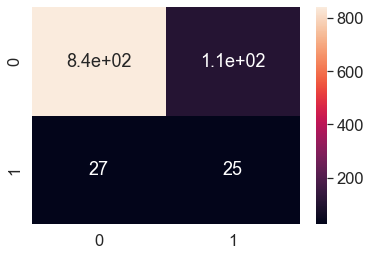

In [ ]:
sns.heatmap(lr_matrix, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predicted_Y_logestic))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       869
           1       0.48      0.19      0.27       131

    accuracy                           0.87      1000
   macro avg       0.68      0.58      0.60      1000
weighted avg       0.83      0.87      0.84      1000



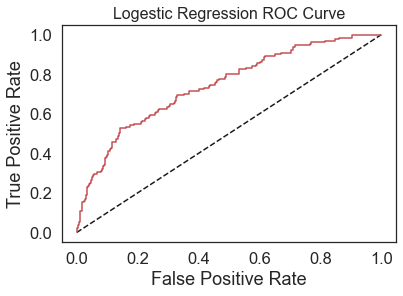

The AUC : 0.58


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

Y_logpred_prob = model_logestic.predict_proba(X_test)[:,1]
fpr_log, tpr_log, thresholds = roc_curve(Y_test, Y_logpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_log, tpr_log, label='Logestic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logestic Regression ROC Curve',fontsize=16)
plt.show();
print(f'The AUC : {round(roc_auc_score(Y_test, predicted_Y_logestic), 3)}')

# 2.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Creating model
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
# Training model
model_rf.fit(X_train, Y_train)

# Predicting using test set
predicted_Y_rf = model_rf.predict(X_test)

# Checking test accuracy score
accuracy_score(predicted_Y_rf, Y_test)
test_accuracy_rf = accuracy_score(predicted_Y_rf, Y_test)

print(' Test Accuracy:', round(test_accuracy_rf*100,2),'%')

# Predicting using train set
predicted_Y_train_rf = model_rf.predict(X_train)

# Checking train accuracy score
accuracy_score(predicted_Y_train_rf, Y_train)
train_accuracy_rf = accuracy_score(predicted_Y_train_rf, Y_train)

print(' Train Accuracy:', round(train_accuracy_rf*100,2),'%')

 Test Accuracy: 98.2 %
 Train Accuracy: 97.94 %


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
rf_matrix = confusion_matrix(predicted_Y_rf, Y_test)
rf_matrix 

array([[869,  18],
       [  0, 113]], dtype=int64)

<AxesSubplot:>

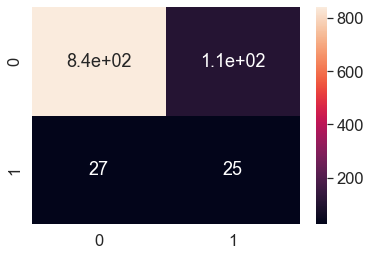

In [ ]:
sns.heatmap(lr_matrix, annot=True) 

In [ ]:
print(classification_report(Y_test, predicted_Y_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       869
           1       1.00      0.86      0.93       131

    accuracy                           0.98      1000
   macro avg       0.99      0.93      0.96      1000
weighted avg       0.98      0.98      0.98      1000



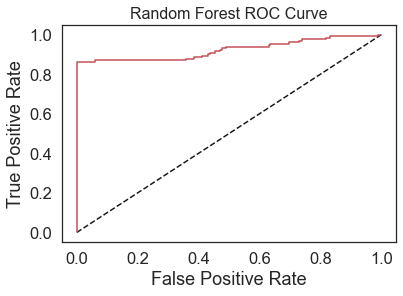

The AUC : 0.931


In [ ]:
Y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(Y_test, Y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();
print(f'The AUC : {round(roc_auc_score(Y_test, predicted_Y_rf), 3)}')

# 3. SVC

In [ ]:
from sklearn.svm import SVC
# Creating model
model_svm = SVC(kernel='linear', probability=True)

# Training model
model_svm.fit(X_train,Y_train)

# Predicting using test set
predicted_Y_svm = model_svm.predict(X_test)

# Checking test accuracy score
accuracy_score(predicted_Y_svm, Y_test)
test_accuracy_svm = accuracy_score(predicted_Y_svm, Y_test)

print(' Test Accuracy:', round(test_accuracy_svm*100,2),'%')

# Predicting using train set
predicted_Y_train_svm = model_svm.predict(X_train)

# Checking train accuracy score
accuracy_score(predicted_Y_train_svm, Y_train)
train_accuracy_svm = accuracy_score(predicted_Y_train_svm, Y_train)

print(' Train Accuracy:', round(train_accuracy_svm*100,2),'%')


 Test Accuracy: 86.9 %
 Train Accuracy: 84.91 %


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
svm_matrix = confusion_matrix(predicted_Y_svm, Y_test)
svm_matrix 

array([[869, 131],
       [  0,   0]], dtype=int64)

<AxesSubplot:>

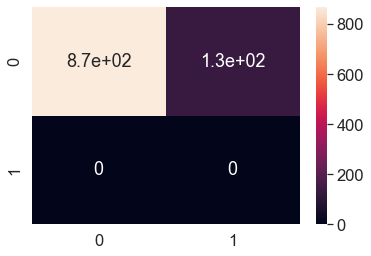

In [ ]:
sns.heatmap(svm_matrix, annot=True) 

In [ ]:
print(classification_report(Y_test, predicted_Y_svm))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       869
           1       0.00      0.00      0.00       131

    accuracy                           0.87      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.76      0.87      0.81      1000



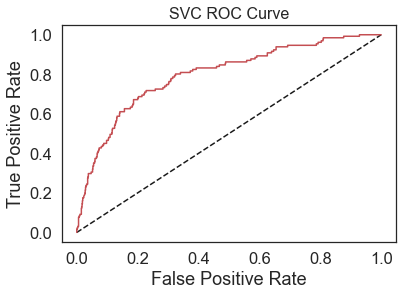

The AUC : 0.5


In [ ]:
Y_svmpred_prob = model_svm.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, thresholds = roc_curve(Y_test, Y_svmpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_svm, tpr_svm, label='SVC',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve',fontsize=16)
plt.show();
print(f'The AUC : {round(roc_auc_score(Y_test, predicted_Y_svm), 3)}')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
#Grid Search CV
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

# 4. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creating model
model_knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(15)}
model_knn = GridSearchCV(estimator=model_knn, param_grid=parameters)

# Training model
model_knn.fit(X_train,Y_train)

# Predicting using test set
predicted_Y_knn = model_knn.predict(X_test)

# Checking test accuracy score
accuracy_score(predicted_Y_knn, Y_test)
test_accuracy_knn = accuracy_score(predicted_Y_knn, Y_test)

print(' Test Accuracy:', round(test_accuracy_knn*100,2),'%')

# Predicting using train set
predicted_Y_train_knn = model_knn.predict(X_train)

# Checking train accuracy score
accuracy_score(predicted_Y_train_knn, Y_train)
train_accuracy_knn = accuracy_score(predicted_Y_train_knn, Y_train)

print(' Train Accuracy:', round(train_accuracy_knn*100,2),'%')

accuracy_score(Y_test, predicted_Y_knn)
accuracy_score =accuracy_score(Y_test, predicted_Y_knn)

print('accuracy_score:', round(accuracy_score*100,2),'%')

 Test Accuracy: 87.8 %
 Train Accuracy: 87.27 %
accuracy_score: 87.8 %


In [ ]:
model_knn.best_params_

{'n_neighbors': 4}

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
knn_matrix = confusion_matrix(predicted_Y_logestic, Y_test)
knn_matrix 

array([[842, 106],
       [ 27,  25]], dtype=int64)

<AxesSubplot:>

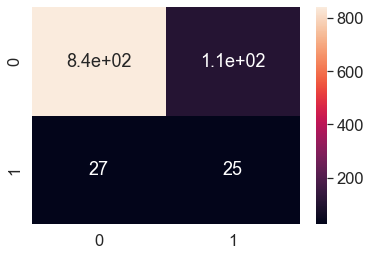

In [ ]:
sns.heatmap(knn_matrix, annot=True) 

In [ ]:
print(classification_report(Y_test, predicted_Y_knn))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       869
           1       0.91      0.08      0.14       131

    accuracy                           0.88      1000
   macro avg       0.89      0.54      0.54      1000
weighted avg       0.88      0.88      0.83      1000



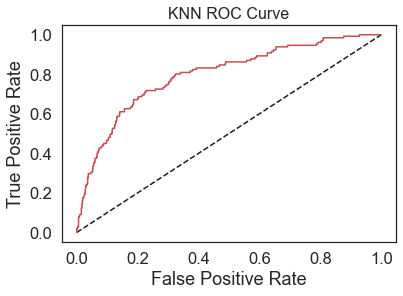

The AUC : 0.538


In [ ]:
Y_knnpred_prob = model_svm.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds = roc_curve(Y_test, Y_knnpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_knn, tpr_knn, label='KNN',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve',fontsize=16)
plt.show();
print(f'The AUC : {round(roc_auc_score(Y_test, predicted_Y_knn), 3)}')

# 5.XGBM

In [ ]:
import math
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Creating model
model_xgb= XGBClassifier()

# Training model
model_xgb.fit(X_train, Y_train)

# Predicting using test set
predicted_Y_xgb = model_xgb.predict(X_test)


# Checking test accuracy score
accuracy_score(predicted_Y_xgb, Y_test)
test_accuracy_xgb = accuracy_score(predicted_Y_xgb, Y_test)

print(' Test Accuracy:', round(test_accuracy_xgb*100,2),'%')

# Predicting using train set
predicted_Y_train_xgb = model_xgb.predict(X_train)

# Checking train accuracy score
accuracy_score(predicted_Y_train_xgb, Y_train)
train_accuracy_xgb = accuracy_score(predicted_Y_train_xgb, Y_train)

print(' Train Accuracy:', round(train_accuracy_xgb*100,2),'%')

 Test Accuracy: 98.2 %
 Train Accuracy: 100.0 %


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
xgb_matrix = confusion_matrix(predicted_Y_xgb, Y_test)
xgb_matrix 

array([[869,  18],
       [  0, 113]], dtype=int64)

<AxesSubplot:>

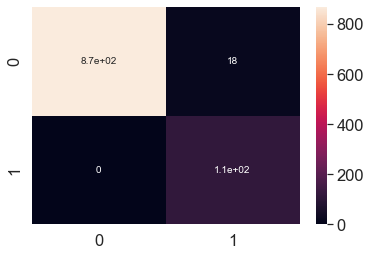

In [ ]:
sns.heatmap(xgb_matrix, annot=True) 


# 6. Bagged Decision Trees for Classification

In [ ]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

array = data.values
X = array[:,0:10]
Y = array[:,10]
seed = 7

kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100

# Creating model
model_bagged = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

# Training model
model_bagged.fit(X_train, Y_train)


# Predicting using test set
predicted_Y_bagged = model_bagged.predict(X_test)

# Checking test accuracy score
accuracy_score(predicted_Y_bagged, Y_test)
test_accuracy_bagged = accuracy_score(predicted_Y_bagged, Y_test)

print(' Test Accuracy:', round(test_accuracy_bagged*100,2),'%')

# Predicting using train set
predicted_Y_train_bagged = model_bagged.predict(X_train)

# Checking train accuracy score
accuracy_score(predicted_Y_train_bagged, Y_train)
train_accuracy_bagged = accuracy_score(predicted_Y_train_bagged, Y_train)

print(' Train Accuracy:', round(train_accuracy_bagged*100,2),'%')

results = cross_val_score(model_bagged, X, Y, cv=kfold)
print(results.mean())

 Test Accuracy: 97.7 %
 Train Accuracy: 100.0 %
0.9759930589271905


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
bagged_matrix = confusion_matrix(predicted_Y_bagged, Y_test)
bagged_matrix 

array([[866,  20],
       [  3, 111]], dtype=int64)

<AxesSubplot:>

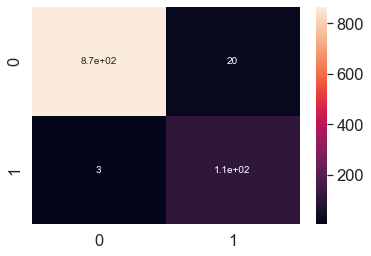

In [ ]:
sns.heatmap(bagged_matrix, annot=True) 

# 7.Random Forest Classification

In [ ]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = array[:,0:10]
Y = array[:,10]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

# Creating model
model_rfc = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

# Training model
model_rfc.fit(X_train, Y_train)

# Predicting using test set
predicted_Y_rfc = model_rfc.predict(X_test)

# Checking test accuracy score
accuracy_score(predicted_Y_rfc, Y_test)
test_accuracy_rfc = accuracy_score(predicted_Y_rfc, Y_test)

print(' Test Accuracy:', round(test_accuracy_rfc*100,2),'%')

# Predicting using train set
predicted_Y_train_rfc = model_rfc.predict(X_train)

# Checking train accuracy score
accuracy_score(predicted_Y_train_rfc, Y_train)
train_accuracy_rfc = accuracy_score(predicted_Y_train_rfc, Y_train)

print(' Train Accuracy:', round(train_accuracy_rfc*100,2),'%')


 Test Accuracy: 98.2 %
 Train Accuracy: 100.0 %


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
rfc_matrix = confusion_matrix(predicted_Y_rfc, Y_test)
rfc_matrix  


array([[869,  18],
       [  0, 113]], dtype=int64)

<AxesSubplot:>

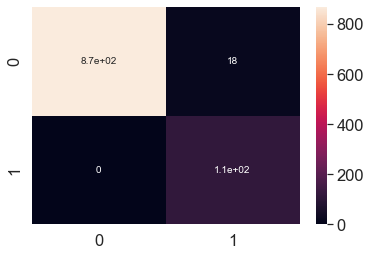

In [ ]:
sns.heatmap(rfc_matrix, annot=True) 

# 8. AdaBoost Classification

In [ ]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

array = data.values

X = array[:,0:10]
Y = array[:,10]

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)

# Creating model
model_ada = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

# Training model
model_ada.fit(X_train, Y_train)

# Predicting using test set
predicted_Y_ada = model_ada.predict(X_test)

# Checking test accuracy score
accuracy_score(predicted_Y_ada, Y_test)
test_accuracy_ada = accuracy_score(predicted_Y_ada, Y_test)

print(' Test Accuracy:', round(test_accuracy_ada*100,2),'%')

# Predicting using train set
predicted_Y_train_ada = model_ada.predict(X_train)

# Checking train accuracy score
accuracy_score(predicted_Y_train_ada, Y_train)
train_accuracy_ada = accuracy_score(predicted_Y_train_ada, Y_train)

print(' Train Accuracy:', round(train_accuracy_ada*100,2),'%')


 Test Accuracy: 92.8 %
 Train Accuracy: 91.77 %


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
ada_matrix = confusion_matrix(predicted_Y_ada, Y_test)
ada_matrix  


array([[853,  56],
       [ 16,  75]], dtype=int64)

<AxesSubplot:>

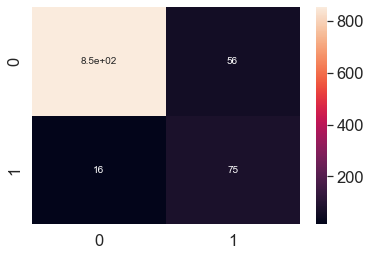

In [ ]:
sns.heatmap(ada_matrix, annot=True) 

# 9.Stacking Ensemble for Classification

In [ ]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

array = data.values
X = array[:,0:10]
Y = array[:,10]
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
model_ens = VotingClassifier(estimators)

# Training model
model_ens.fit(X_train, Y_train)

# Predicting using test set
predicted_Y_ens = model_ens.predict(X_test)

# Checking test accuracy score
accuracy_score(predicted_Y_ens, Y_test)
test_accuracy_ens = accuracy_score(predicted_Y_ens, Y_test)

print(' Test Accuracy:', round(test_accuracy_ens*100,2),'%')

# Predicting using train set
predicted_Y_train_ens = model_ens.predict(X_train)

# Checking train accuracy score
accuracy_score(predicted_Y_train_ens, Y_train)
train_accuracy_ens = accuracy_score(predicted_Y_train_ens, Y_train)

print(' Train Accuracy:', round(train_accuracy_ens*100,2),'%')


 Test Accuracy: 90.0 %
 Train Accuracy: 88.64 %


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
ens_matrix = confusion_matrix(predicted_Y_ens, Y_test)
ens_matrix

array([[868,  99],
       [  1,  32]], dtype=int64)

<AxesSubplot:>

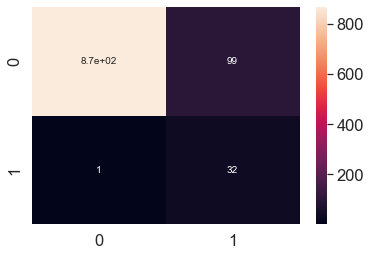

In [ ]:
sns.heatmap(ens_matrix, annot=True) 

# Comparing algorithms

In [ ]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

array = data.values
X = array[:,0:10]
Y = array[:,10]

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('XGB', XGBClassifier()))
ensemble = VotingClassifier(estimators)
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.861372 (0.021917)
KNN: 0.866471 (0.026277)
CART: 0.950792 (0.012186)
NB: 0.850276 (0.013417)
SVM: 0.855072 (0.026752)
AdaBoost: 0.916294 (0.014098)
RFC: 0.978395 (0.009671)
Bagging: 0.975393 (0.008795)
XGB: 0.977795 (0.008198)


# Comparing Models

In [ ]:
models = pd.Series(["model_logestic","model_rf", "model_svm", "model_knn", "model_xgb", "model_bagged", "model_rfc", "model_ada",
                    "model_ens"])
train_accuracy = pd.Series([train_accuracy_logestic, train_accuracy_rf, train_accuracy_svm, train_accuracy_knn,
                            train_accuracy_xgb, train_accuracy_bagged, train_accuracy_rfc, train_accuracy_ada,
                            train_accuracy_ens])
test_accuracy = pd.Series([test_accuracy_logestic, test_accuracy_rf, test_accuracy_svm, test_accuracy_knn,
                           test_accuracy_xgb, test_accuracy_bagged, test_accuracy_rfc, test_accuracy_ada,
                           test_accuracy_ens])

Result = pd.DataFrame({"Models":models, "Test Accuracy":test_accuracy, "Train Accuracy":train_accuracy})
Result

,Models,Test Accuracy,Train Accuracy
0,model_logestic,0.867,0.854694
1,model_rf,0.982,0.979426
2,model_svm,0.869,0.849121
3,model_knn,0.878,0.872696
4,model_xgb,0.982,1.000000
5,model_bagged,0.977,1.000000
6,model_rfc,0.982,1.000000
7,model_ada,0.928,0.917703
8,model_ens,0.900,0.886412


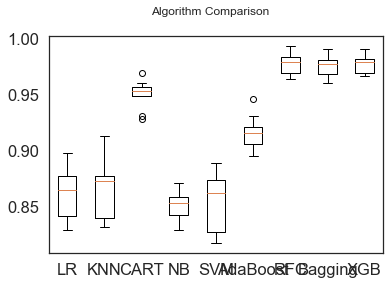

In [ ]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
import xgboost as xgb
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model_xgb = xgb.XGBClassifier()
model_xgb = model_xgb.fit(X_train, y_train)

print(model_xgb.predict(X_test))
print(model_xgb.predict_proba(X_test))


[0 1 0 1 0 1 1 1 1 1]
[[0.587 0.413]
 [0.145 0.855]
 [0.714 0.286]
 [0.029 0.971]
 [0.984 0.016]
 [0.007 0.993]
 [0.486 0.514]
 [0.02  0.98 ]
 [0.009 0.991]
 [0.006 0.994]]


In [ ]:
model_xgb.predict_proba(X_test)*100

array([[58.701, 41.299],
       [14.537, 85.463],
       [71.449, 28.551],
       [ 2.912, 97.088],
       [98.375,  1.625],
       [ 0.743, 99.257],
       [48.58 , 51.42 ],
       [ 2.021, 97.979],
       [ 0.883, 99.117],
       [ 0.644, 99.356]], dtype=float32)